In [2]:
# import the libraries
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as model_selection

In [4]:
df_stores = pd.read_csv('stores.csv')
df_features = pd.read_csv('features.csv')
df_test = pd.read_csv('test_redi.csv')
df_train = pd.read_csv('train_redi.csv')

In [5]:
df_stores.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [6]:
print(df_features.shape)
df_features.head()

(8190, 12)


Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [7]:
print(df_test.shape)
df_test.head()

(42157, 5)


Unnamed: 0  Store  Dept        Date  IsHoliday
0           0     28    40  2012-01-06      False
1           1     18    93  2012-03-09      False
2           2     38     4  2011-05-27      False
3           3     29    33  2010-03-12      False
4           4     13    52  2010-10-29      False

In [8]:
print(df_train.shape)
df_train.head()

(379413, 6)


Unnamed: 0  Store  Dept        Date  Weekly_Sales  IsHoliday
0           0     21    24  2011-05-20       6716.32      False
1           1     29    12  2010-02-12       1741.04       True
2           2      3    96  2012-06-08       4525.13      False
3           3     14    95  2011-10-14     136819.10      False
4           4      9    52  2011-11-04       2002.81      False

In [9]:
df_train.isnull().sum()

Unnamed: 0      0
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [10]:
df_test.drop('Unnamed: 0', inplace=True, axis=1)
df_train.drop('Unnamed: 0', inplace=True, axis=1)

In [11]:
df_test.head()

Store  Dept        Date  IsHoliday
0     28    40  2012-01-06      False
1     18    93  2012-03-09      False
2     38     4  2011-05-27      False
3     29    33  2010-03-12      False
4     13    52  2010-10-29      False

In [12]:
#Creating additional column(Weekly_Sales to make the total columns in test and train similar 6)
df_test['Weekly_Sales'] = np.nan
df_test.head()

Store  Dept        Date  IsHoliday  Weekly_Sales
0     28    40  2012-01-06      False           NaN
1     18    93  2012-03-09      False           NaN
2     38     4  2011-05-27      False           NaN
3     29    33  2010-03-12      False           NaN
4     13    52  2010-10-29      False           NaN

In [13]:
#Merging Features ana Stores
df_feat_sto = pd.merge(df_features, df_stores,on='Store', how='inner')
print(df_feat_sto.head())

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday Type  \
0        NaN        NaN        NaN  211.096358         8.106      False    A   
1        NaN        NaN        NaN  211.242170         8.106       True    A   
2        NaN        NaN        NaN  211.289143         8.106      False    A   
3        NaN        NaN        NaN  211.319643         8.106      False    A   
4        NaN        NaN        NaN  211.350143         8.106      False    A   

     Size  
0  151315  
1  151315  
2  151315  
3  151315  
4  151315  


In [14]:
#Merging Test and Train Datasets as df_with_Test, df_with_Train
df_with_Test = pd.merge(df_feat_sto, df_test,on=['Date','Store','IsHoliday'],how='inner')
df_with_Train = pd.merge(df_feat_sto, df_train,on=['Date','Store','IsHoliday'],how='inner')

print(df_with_Test.head())

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-05        42.31       2.572        NaN        NaN   
2      1  2010-02-05        42.31       2.572        NaN        NaN   
3      1  2010-02-05        42.31       2.572        NaN        NaN   
4      1  2010-02-05        42.31       2.572        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday Type  \
0        NaN        NaN        NaN  211.096358         8.106      False    A   
1        NaN        NaN        NaN  211.096358         8.106      False    A   
2        NaN        NaN        NaN  211.096358         8.106      False    A   
3        NaN        NaN        NaN  211.096358         8.106      False    A   
4        NaN        NaN        NaN  211.096358         8.106      False    A   

     Size  Dept  Weekly_Sales  
0  151315    49           NaN  
1  151315    33           Na

In [15]:
df_with_Train.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       243945
MarkDown2       279310
MarkDown3       256145
MarkDown4       258029
MarkDown5       243260
CPI                  0
Unemployment         0
IsHoliday            0
Type                 0
Size                 0
Dept                 0
Weekly_Sales         0
dtype: int64

In [16]:
# Creating a column to identify the test and train data
df_with_Train['train/test'] = 'Train'
df_with_Test['train/test'] = 'Test'

In [17]:
df_with_Test.sample(10)

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
20521     21  2012-01-27        50.79       3.290     714.08     602.88   
29219     30  2012-08-17        85.55       3.571     168.82        NaN   
16289     17  2011-09-02        69.31       3.580        NaN        NaN   
26606     27  2012-06-15        69.52       3.786    9943.48     614.90   
13511     14  2012-03-09        45.52       3.848   15710.87    1050.48   
16886     18  2010-07-09        79.75       2.806        NaN        NaN   
490        1  2011-06-03        83.00       3.699        NaN        NaN   
20751     21  2012-10-05        70.28       3.617    7818.46        NaN   
34505     36  2012-08-17        85.89       3.571     442.05        NaN   
11116     12  2011-04-01        63.63       3.772        NaN        NaN   

       MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
20521        NaN      18.42    2562.85  219.718864         7.057      False   
29219       2.13        NaN    1321.30  221.675146         6.565      False   
16289        NaN        NaN        NaN  129.325935         6.745      False   
26606      15.00    3382.44    6779.57  142.129255         8.253      False   
13511       1.49    2302.28    2702.96  190.335997         8.424      False   
16886        NaN        NaN        NaN  132.546133         9.342      False   
490          NaN        NaN        NaN  215.273655         7.682      False   
20751      21.03    4198.54    4532.58  222.815930         6.170      False   
34505        NaN        NaN    1381.39  220.719961         6.623      False   
11116        NaN        NaN        NaN  128.719935        13.736      False   

      Type    Size  Dept  Weekly_Sales train/test  
20521    B  140167    18           NaN       Test  
29219    C   42988    59           NaN       Test  
16289    B   93188    44           NaN       Test  
26606    A  204184    83           NaN       Test  
13511    A  200898    67           NaN       Test  
16886    B  120653    72           NaN       Test  
490      A  151315    24           NaN       Test  
20751    B  140167    49           NaN       Test  
34505    A   39910    10           NaN       Test  
11116    B  112238    14           NaN       Test

In [18]:
df_with_Train.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-05        42.31       2.572        NaN        NaN   
2      1  2010-02-05        42.31       2.572        NaN        NaN   
3      1  2010-02-05        42.31       2.572        NaN        NaN   
4      1  2010-02-05        42.31       2.572        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday Type  \
0        NaN        NaN        NaN  211.096358         8.106      False    A   
1        NaN        NaN        NaN  211.096358         8.106      False    A   
2        NaN        NaN        NaN  211.096358         8.106      False    A   
3        NaN        NaN        NaN  211.096358         8.106      False    A   
4        NaN        NaN        NaN  211.096358         8.106      False    A   

     Size  Dept  Weekly_Sales train/test  
0  151315    91      62424.14      Train  
1  151315     6       5749.03      Train  
2  151315    67       8414.14      Train  
3  151315    11      24213.18      Train  
4  151315     3      13740.12      Train

In [19]:
#Bringing all the datasets together.
df_total = pd.concat([df_with_Test, df_with_Train], axis=0, ignore_index = True)

In [20]:
df_total.shape

(421570, 17)

In [21]:
df_total.sample(5)

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
123908     10  2010-12-10        60.51       3.091        NaN        NaN   
57454       2  2011-11-18        62.01       3.308    6490.92    1217.76   
379798     40  2011-03-25        28.89       3.624        NaN        NaN   
7056        8  2010-09-10        74.34       2.565        NaN        NaN   
114993      9  2010-10-15        67.36       2.720        NaN        NaN   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
123908        NaN        NaN        NaN  126.793400         9.003      False   
57454      152.12     873.82    7656.42  217.867022         7.441      False   
379798        NaN        NaN        NaN  133.958742         5.114      False   
7056          NaN        NaN        NaN  214.852873         6.315       True   
114993        NaN        NaN        NaN  215.358992         6.560      False   

       Type    Size  Dept  Weekly_Sales train/test  
123908    B  126512    41      17951.75      Train  
57454     A  202307    82      21930.35      Train  
379798    A  155083    36        419.00      Train  
7056      A  155078    14           NaN       Test  
114993    B  125833    38      72914.80      Train

In [22]:
df_total['Year'] = pd.to_datetime(df_total['Date']).dt.year
df_total['Month'] = pd.to_datetime(df_total['Date']).dt.month
df_total['Week'] = pd.to_datetime(df_total['Date']).dt.week

In [23]:
df_total.sample(5)

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
310630     31  2011-04-15        71.01       3.743        NaN        NaN   
257386     25  2010-09-03        71.17       2.715        NaN        NaN   
249313     24  2010-12-31        25.90       3.336        NaN        NaN   
29597      31  2011-01-07        44.24       2.976        NaN        NaN   
400380     42  2012-10-26        70.50       4.301        NaN       0.75   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
310630        NaN        NaN        NaN  214.942063         7.931      False   
257386        NaN        NaN        NaN  204.758357         7.527      False   
249313        NaN        NaN        NaN  132.815032         8.275       True   
29597         NaN        NaN        NaN  211.064888         8.028      False   
400380        2.0        NaN    1034.55  131.193097         6.943      False   

       Type    Size  Dept  Weekly_Sales train/test  Year  Month  Week  
310630    A  203750    41        761.50      Train  2011      4    15  
257386    B  128107    11      10228.35      Train  2010      9    35  
249313    A  203819    20       4384.01      Train  2010     12    52  
29597     A  203750    29           NaN       Test  2011      1     1  
400380    C   39690    98       6567.83      Train  2012     10    43

In [24]:
from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
df_total['IsHoliday']= le.fit_transform(df_total['IsHoliday'])

In [25]:
df_total['IsHoliday'].unique()

array([0, 1], dtype=int64)

In [26]:
df_total['Type'] = df_total['Type'].map({'A': 0, 'B': 1, 'C':2}) # you can use labelencoder here
df_total.sample(5)

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
84687       5  2012-05-04        77.10       3.749    6396.61        NaN   
158359     14  2010-05-07        70.75       2.966        NaN        NaN   
357579     37  2011-08-05        86.71       3.684        NaN        NaN   
19481      20  2011-12-16        37.16       3.413    5488.56     217.03   
259715     25  2011-05-27        67.18       3.985        NaN        NaN   

        MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
84687       83.63    1183.64    2813.83  222.259472         5.801          0   
158359        NaN        NaN        NaN  181.646815         8.899          0   
357579        NaN        NaN        NaN  214.297294         8.177          0   
19481     1776.71     466.19    4535.27  212.068504         7.082          0   
259715        NaN        NaN        NaN  208.556714         7.287          0   

        Type    Size  Dept  Weekly_Sales train/test  Year  Month  Week  
84687      1   34875    59         -7.97      Train  2012      5    18  
158359     0  200898    32      20799.47      Train  2010      5    18  
357579     2   39910    52         32.78      Train  2011      8    31  
19481      0  203742    16           NaN       Test  2011     12    50  
259715     1  128107    21       4482.60      Train  2011      5    21

In [27]:
original_date_col = df_total['Date'].copy(deep=True)

In [28]:
df_total.drop(['Date'], inplace=True, axis = 1)
df_total.sample(5)

Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
16298      17        61.94       3.619        NaN        NaN        NaN   
390560     41        58.74       3.498        NaN        NaN        NaN   
346674     35        49.40       3.953   19560.85      77.41       7.40   
234858     22        35.68       3.568    1048.86    4022.06        NaN   
404403     43        55.70       3.236       3.37        NaN       5.76   

        MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  Type  \
16298         NaN        NaN  129.368613         6.745          1     1   
390560        NaN        NaN  194.945972         6.759          0     0   
346674    4081.77    3629.96  141.699086         8.744          0     1   
234858       9.88    2507.98  140.912402         7.503          0     1   
404403        NaN     212.75  210.088857        10.148          1     2   

          Size  Dept  Weekly_Sales train/test  Year  Month  Week  
16298    93188    55           NaN       Test  2011      9    36  
390560  196321    58       8590.00      Train  2011     10    40  
346674  103681     2      42091.99      Train  2012      3    13  
234858  119557    90      21852.89      Train  2012      1     4  
404403   41062     6         75.40      Train  2011     11    47

In [29]:
df_total.head()

Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0      1        42.31       2.572        NaN        NaN        NaN        NaN   
1      1        42.31       2.572        NaN        NaN        NaN        NaN   
2      1        42.31       2.572        NaN        NaN        NaN        NaN   
3      1        42.31       2.572        NaN        NaN        NaN        NaN   
4      1        42.31       2.572        NaN        NaN        NaN        NaN   

   MarkDown5         CPI  Unemployment  IsHoliday  Type    Size  Dept  \
0        NaN  211.096358         8.106          0     0  151315    49   
1        NaN  211.096358         8.106          0     0  151315    33   
2        NaN  211.096358         8.106          0     0  151315     7   
3        NaN  211.096358         8.106          0     0  151315    58   
4        NaN  211.096358         8.106          0     0  151315    23   

   Weekly_Sales train/test  Year  Month  Week  
0           NaN       Test  2010      2     5  
1           NaN       Test  2010      2     5  
2           NaN       Test  2010      2     5  
3           NaN       Test  2010      2     5  
4           NaN       Test  2010      2     5

In [30]:
#Dealing with 'Null' data
df_total.isnull().sum()

Store                0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday            0
Type                 0
Size                 0
Dept                 0
Weekly_Sales     42157
train/test           0
Year                 0
Month                0
Week                 0
dtype: int64

In [31]:
df_total['MarkDown1'].fillna(0, inplace=True)
df_total['MarkDown2'].fillna(0, inplace=True)
df_total['MarkDown3'].fillna(0, inplace=True)
df_total['MarkDown4'].fillna(0, inplace=True)
df_total['MarkDown5'].fillna(0, inplace=True)

In [32]:
df_total.isnull().sum()

Store               0
Temperature         0
Fuel_Price          0
MarkDown1           0
MarkDown2           0
MarkDown3           0
MarkDown4           0
MarkDown5           0
CPI                 0
Unemployment        0
IsHoliday           0
Type                0
Size                0
Dept                0
Weekly_Sales    42157
train/test          0
Year                0
Month               0
Week                0
dtype: int64

In [33]:
df_total.describe()

Store    Temperature     Fuel_Price      MarkDown1  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      60.090059       3.361027    2590.074819   
std        12.785297      18.447931       0.458515    6052.385934   
min         1.000000      -2.060000       2.472000       0.000000   
25%        11.000000      46.680000       2.933000       0.000000   
50%        22.000000      62.090000       3.452000       0.000000   
75%        33.000000      74.280000       3.738000    2809.050000   
max        45.000000     100.140000       4.468000   88646.760000   

           MarkDown2      MarkDown3      MarkDown4      MarkDown5  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean      879.974298     468.087665    1083.132268    1662.772385   
std      5084.538801    5528.873453    3894.529945    4207.629321   
min      -265.760000     -29.100000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         2.200000       4.540000     425.290000    2168.040000   
max    104519.540000  141630.610000   67474.850000  108519.280000   

                 CPI   Unemployment      IsHoliday           Type  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean      171.201947       7.960289       0.070358       0.589912   
std        39.159276       1.863296       0.255750       0.666337   
min       126.064000       3.879000       0.000000       0.000000   
25%       132.022667       6.891000       0.000000       0.000000   
50%       182.318780       7.866000       0.000000       0.000000   
75%       212.416993       8.572000       0.000000       1.000000   
max       227.232807      14.313000       1.000000       2.000000   

                Size           Dept   Weekly_Sales           Year  \
count  421570.000000  421570.000000  379413.000000  421570.000000   
mean   136727.915739      44.260317   15987.888450    2010.968591   
std     60980.583328      30.492054   22732.133557       0.796876   
min     34875.000000       1.000000   -4988.940000    2010.000000   
25%     93638.000000      18.000000    2080.650000    2010.000000   
50%    140167.000000      37.000000    7609.200000    2011.000000   
75%    202505.000000      74.000000   20213.420000    2012.000000   
max    219622.000000      99.000000  693099.360000    2012.000000   

               Month           Week  
count  421570.000000  421570.000000  
mean        6.449510      25.826762  
std         3.243217      14.151887  
min         1.000000       1.000000  
25%         4.000000      14.000000  
50%         6.000000      26.000000  
75%         9.000000      38.000000  
max        12.000000      52.000000

In [36]:
df_total.to_csv('total_data.csv')

In [38]:
df = pd.read_csv('total_data.csv')

In [39]:
df['Weekly_Sales'].sample(10)

42264      2849.12
68141       244.41
385409     4979.14
373889    42208.59
63906      9186.32
251936     2847.85
278923     7621.40
350563      935.72
304088    64846.59
231296    55640.45
Name: Weekly_Sales, dtype: float64

In [40]:
df_total['Week'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,  1,  2,  3,
        4], dtype=int64)

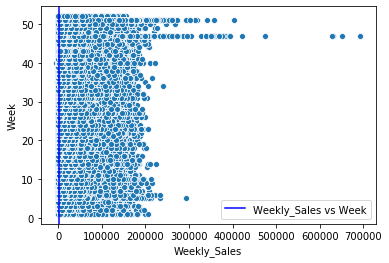

In [41]:
sns.scatterplot(
    x=df_total.Weekly_Sales,
    y=df_total.Week)
plt.axvline(x=1768.56, label ='Weekly_Sales vs Week', c= 'Blue')
plt.legend()
plt.show()

In [42]:
#sns.pairplot(df_total)
#plt.axvline(x=1768.56, label ='Pairplot of variables')
#plt.legend()
#plt.show()

In [43]:
!pip install pywedge
import pywedge as pw

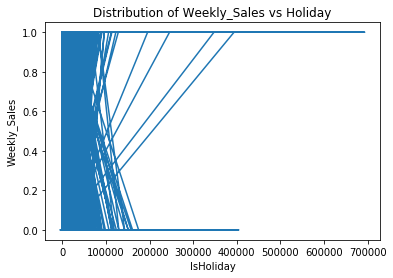

In [44]:
plt.xlabel('IsHoliday')
plt.ylabel('Weekly_Sales')
plt.title('Distribution of Weekly_Sales vs Holiday')
plt.plot('Weekly_Sales', 'IsHoliday', data=df_total)
plt.show()

In [45]:
df_total

Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0           1        42.31       2.572       0.00       0.00        0.0   
1           1        42.31       2.572       0.00       0.00        0.0   
2           1        42.31       2.572       0.00       0.00        0.0   
3           1        42.31       2.572       0.00       0.00        0.0   
4           1        42.31       2.572       0.00       0.00        0.0   
...       ...          ...         ...        ...        ...        ...   
421565     45        58.85       3.882    4018.91      58.08      100.0   
421566     45        58.85       3.882    4018.91      58.08      100.0   
421567     45        58.85       3.882    4018.91      58.08      100.0   
421568     45        58.85       3.882    4018.91      58.08      100.0   
421569     45        58.85       3.882    4018.91      58.08      100.0   

        MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  Type  \
0            0.00       0.00  211.096358         8.106          0     0   
1            0.00       0.00  211.096358         8.106          0     0   
2            0.00       0.00  211.096358         8.106          0     0   
3            0.00       0.00  211.096358         8.106          0     0   
4            0.00       0.00  211.096358         8.106          0     0   
...           ...        ...         ...           ...        ...   ...   
421565     211.94     858.33  192.308899         8.667          0     1   
421566     211.94     858.33  192.308899         8.667          0     1   
421567     211.94     858.33  192.308899         8.667          0     1   
421568     211.94     858.33  192.308899         8.667          0     1   
421569     211.94     858.33  192.308899         8.667          0     1   

          Size  Dept  Weekly_Sales train/test  Year  Month  Week  
0       151315    49           NaN       Test  2010      2     5  
1       151315    33           NaN       Test  2010      2     5  
2       151315     7           NaN       Test  2010      2     5  
3       151315    58           NaN       Test  2010      2     5  
4       151315    23           NaN       Test  2010      2     5  
...        ...   ...           ...        ...   ...    ...   ...  
421565  118221    44       3144.09      Train  2012     10    43  
421566  118221    56        937.72      Train  2012     10    43  
421567  118221     9      16049.13      Train  2012     10    43  
421568  118221    24       5865.79      Train  2012     10    43  
421569  118221    29       3923.41      Train  2012     10    43  

[421570 rows x 19 columns]

In [46]:
df_total['Weekly_Sales'].fillna(0, inplace = True)

In [47]:
df_total

Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0           1        42.31       2.572       0.00       0.00        0.0   
1           1        42.31       2.572       0.00       0.00        0.0   
2           1        42.31       2.572       0.00       0.00        0.0   
3           1        42.31       2.572       0.00       0.00        0.0   
4           1        42.31       2.572       0.00       0.00        0.0   
...       ...          ...         ...        ...        ...        ...   
421565     45        58.85       3.882    4018.91      58.08      100.0   
421566     45        58.85       3.882    4018.91      58.08      100.0   
421567     45        58.85       3.882    4018.91      58.08      100.0   
421568     45        58.85       3.882    4018.91      58.08      100.0   
421569     45        58.85       3.882    4018.91      58.08      100.0   

        MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  Type  \
0            0.00       0.00  211.096358         8.106          0     0   
1            0.00       0.00  211.096358         8.106          0     0   
2            0.00       0.00  211.096358         8.106          0     0   
3            0.00       0.00  211.096358         8.106          0     0   
4            0.00       0.00  211.096358         8.106          0     0   
...           ...        ...         ...           ...        ...   ...   
421565     211.94     858.33  192.308899         8.667          0     1   
421566     211.94     858.33  192.308899         8.667          0     1   
421567     211.94     858.33  192.308899         8.667          0     1   
421568     211.94     858.33  192.308899         8.667          0     1   
421569     211.94     858.33  192.308899         8.667          0     1   

          Size  Dept  Weekly_Sales train/test  Year  Month  Week  
0       151315    49          0.00       Test  2010      2     5  
1       151315    33          0.00       Test  2010      2     5  
2       151315     7          0.00       Test  2010      2     5  
3       151315    58          0.00       Test  2010      2     5  
4       151315    23          0.00       Test  2010      2     5  
...        ...   ...           ...        ...   ...    ...   ...  
421565  118221    44       3144.09      Train  2012     10    43  
421566  118221    56        937.72      Train  2012     10    43  
421567  118221     9      16049.13      Train  2012     10    43  
421568  118221    24       5865.79      Train  2012     10    43  
421569  118221    29       3923.41      Train  2012     10    43  

[421570 rows x 19 columns]

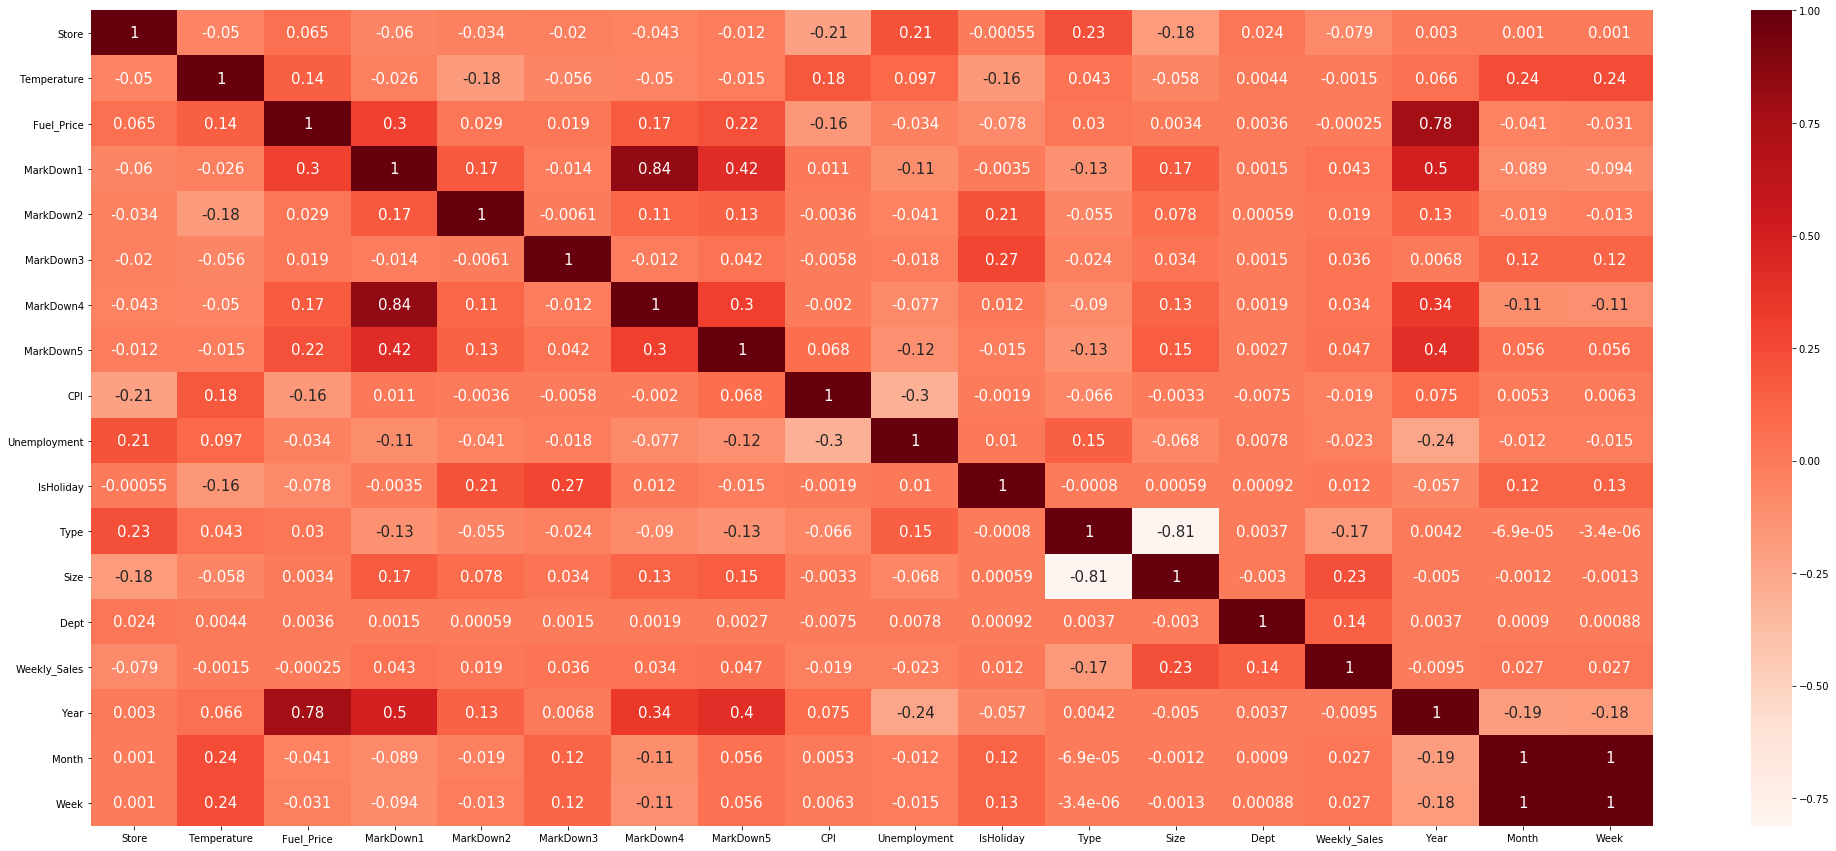

In [48]:
plt.figure(figsize=(35, 15))
sns.heatmap(df_total.corr(), annot=True, cmap="Reds", annot_kws={"size":15})

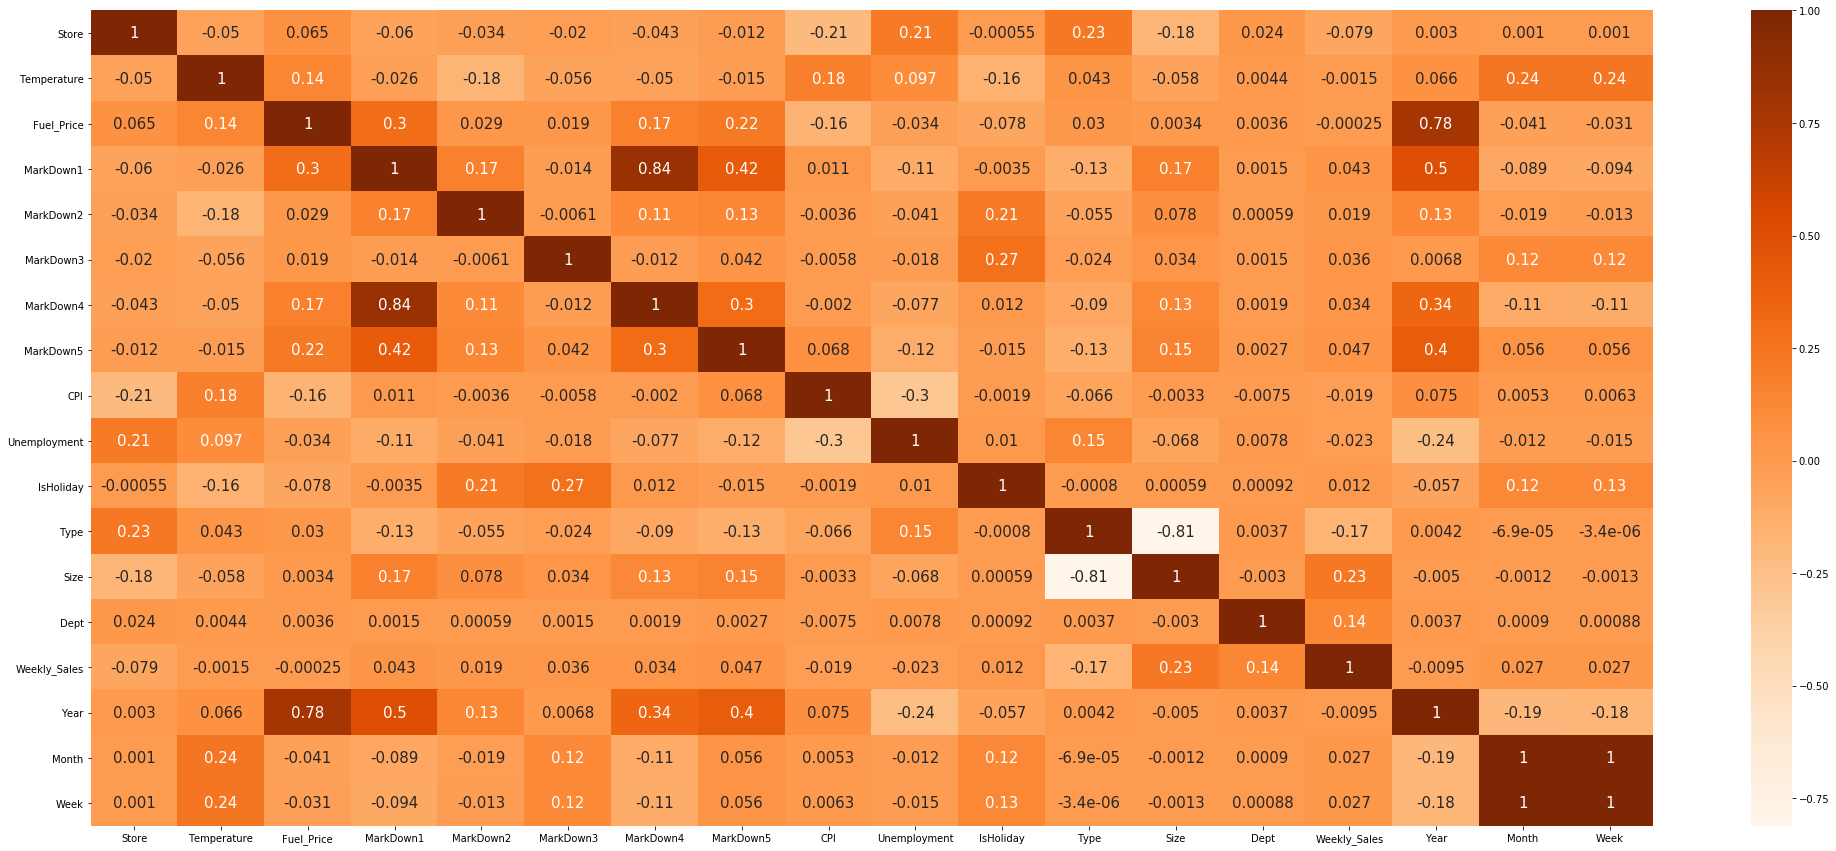

In [49]:
plt.figure(figsize=(35, 15))
sns.heatmap(df_total.corr(), annot=True, cmap="Oranges", annot_kws={"size":15})

#cmaps['Diverging'] = [
#            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
#            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

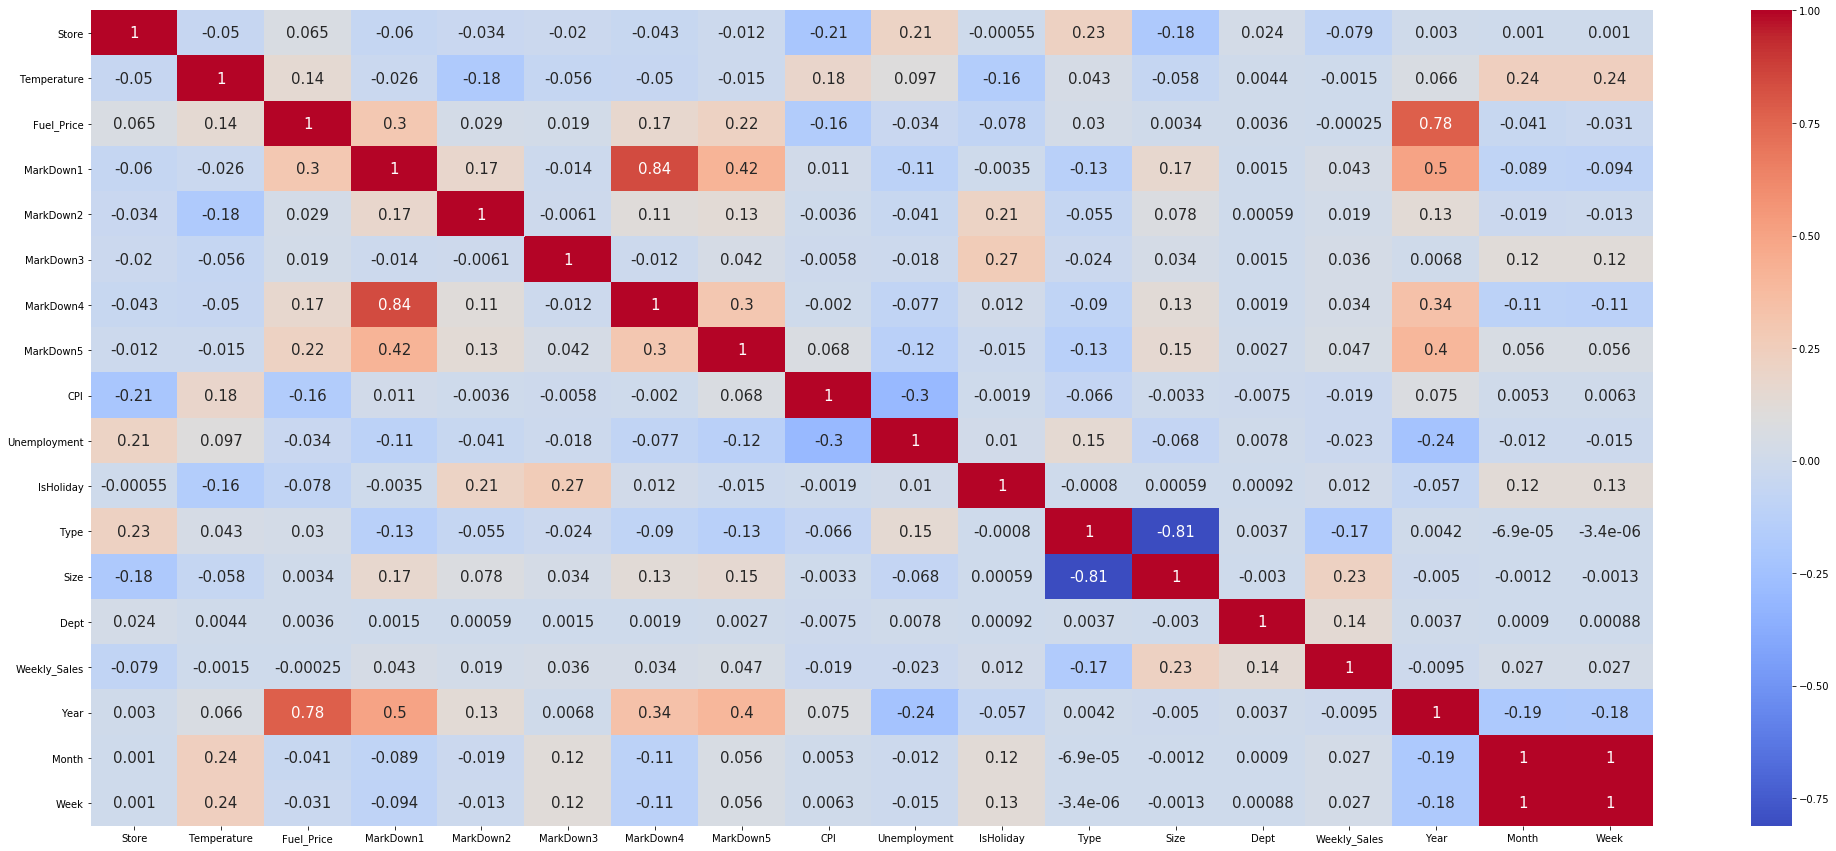

In [50]:
plt.figure(figsize=(35, 15))
sns.heatmap(df_total.corr(), annot=True, cmap="coolwarm", annot_kws={"size":15})

#cmaps['Diverging'] = [
#            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
#            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

Correlation Metrics:

0: no correlation at all 0-0.3: weak correlation 0.3-0.7: moderate correlaton 0.7-1: strong correlation


In [51]:
chart_temp = pw.Pywedge_Charts(df_total, c=None, y='Weekly_Sales')
chart1 = chart_temp.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

In [52]:
chart_temp = pw.Pywedge_Charts(df_total, c=None, y='Weekly_Sales')
chart1 = chart_temp.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

In [53]:
chart_temp = pw.Pywedge_Charts(df_total, c=None, y='Weekly_Sales')
chart1 = chart_temp.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

In [54]:
chart_temp = pw.Pywedge_Charts(df_total, c=None, y='Weekly_Sales')
chart1 = chart_temp.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

In [55]:
chart_temp = pw.Pywedge_Charts(df_total, c=None, y='Weekly_Sales')
chart1 = chart_temp.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

In [56]:
import plotly.express as px

#Reviewing the effect of weekly sales across the weeks in the year.

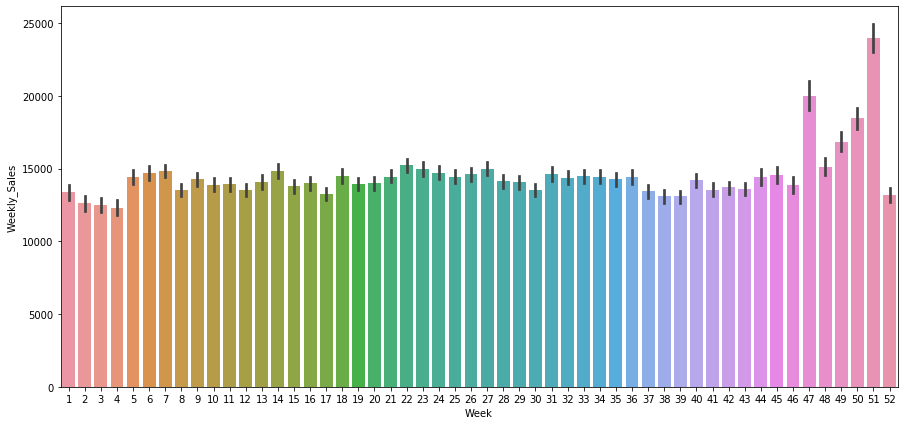

In [57]:
plt.figure(figsize=(15,7))
sns.barplot(x='Week', y='Weekly_Sales', data=df_total)

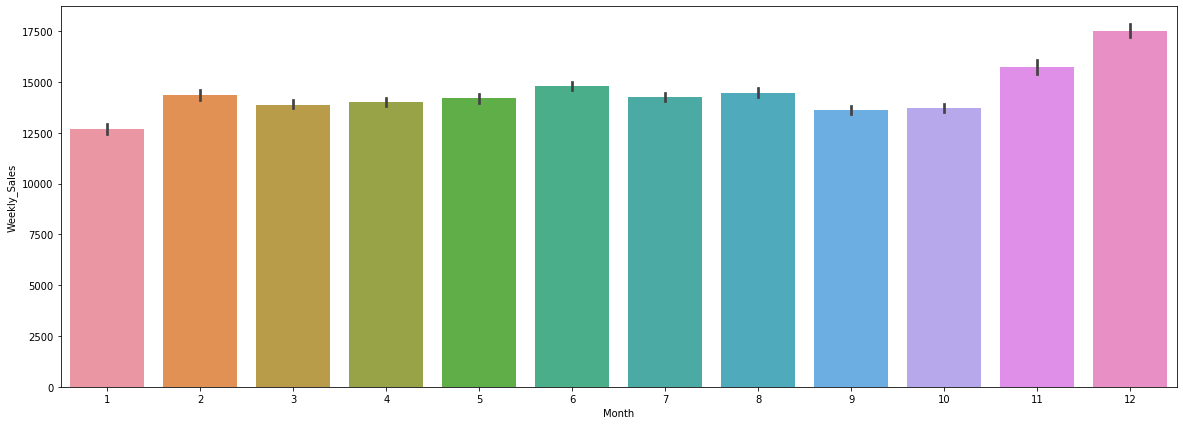

In [58]:
plt.figure(figsize=(20,7))
sns.barplot(x='Month', y='Weekly_Sales', data=df_total)

In [59]:
# Selecting the possible variables

#factors = ['Store',	'Temperature',	'Fuel_Price',	'MarkDown1',	'MarkDown2',	'MarkDown3',	'MarkDown4',	'MarkDown5',	'CPI',	'Unemployment',	'IsHoliday',	'Type',	'Size',	'Dept', 'Weekly_Sales','Year',	'Month', 'Week']
#display(df_total[factors].head())

Correlation Metrics:

0: no correlation at all
0-0.3: weak correlation
0.3-0.7: moderate correlaton
0.7-1: strong correlation

## Split Cleaned Train and Test Data

In [60]:
df_total['train/test'].value_counts()

Train    379413
Test      42157
Name: train/test, dtype: int64

In [61]:
df_train = df_total[df_total['train/test'] == 'Train'].copy()
df_test = df_total[df_total['train/test'] == 'Test'].copy()

In [62]:
df_train = df_train.drop(columns='train/test')
df_test = df_test.drop(columns=['train/test', 'Weekly_Sales'])

In [63]:
df_train.isnull().sum()

Store           0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
Dept            0
Weekly_Sales    0
Year            0
Month           0
Week            0
dtype: int64

In [64]:
df_test.isnull().sum()

Store           0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
Dept            0
Year            0
Month           0
Week            0
dtype: int64

In [65]:
df_train.to_pickle('cleaned_train.pkl')
df_test.to_pickle('cleaned_test.pkl')

## Load Cleaned

In [66]:
#del df_total

In [67]:
# Selecting the possible variables
factors = ['Store',	'Temperature',	'Fuel_Price',	'MarkDown1',	'MarkDown2',	'MarkDown3',	'MarkDown4',	'MarkDown5',	'CPI',	'Unemployment',	'IsHoliday',	'Type',	'Size',	'Dept','Year',	'Month', 'Week']

In [68]:
df_train = pd.read_pickle('cleaned_train.pkl')

In [69]:
#Separating the dataset into dependent (X) and independent variables(Y). This is done by subsuming 'factors' into 'train' dataframe
X = df_train[factors]

Y = df_train['Weekly_Sales']

print(X.shape)
print(Y.shape)

(379413, 17)
(379413,)


In [70]:
#Tramsforming the Dataset for ease of further analysis

X.info()
transformer = StandardScaler().fit(X)
scaled_x = transformer.transform(X)

scaled_x

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379413 entries, 42157 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         379413 non-null  int64  
 1   Temperature   379413 non-null  float64
 2   Fuel_Price    379413 non-null  float64
 3   MarkDown1     379413 non-null  float64
 4   MarkDown2     379413 non-null  float64
 5   MarkDown3     379413 non-null  float64
 6   MarkDown4     379413 non-null  float64
 7   MarkDown5     379413 non-null  float64
 8   CPI           379413 non-null  float64
 9   Unemployment  379413 non-null  float64
 10  IsHoliday     379413 non-null  int64  
 11  Type          379413 non-null  int64  
 12  Size          379413 non-null  int64  
 13  Dept          379413 non-null  int64  
 14  Year          379413 non-null  int64  
 15  Month         379413 non-null  int64  
 16  Week          379413 non-null  int64  
dtypes: float64(9), int64(8)
memory usage: 52.1 M

array([[-1.65796126, -0.96447107, -1.72041913, ..., -1.21507941,
        -1.37230897, -1.4720683 ],
       [-1.65796126, -0.96447107, -1.72041913, ..., -1.21507941,
        -1.37230897, -1.4720683 ],
       [-1.65796126, -0.96447107, -1.72041913, ..., -1.21507941,
        -1.37230897, -1.4720683 ],
       ...,
       [ 1.78359469, -0.06784757,  1.13571498, ...,  1.29486704,
         1.09449136,  1.21330515],
       [ 1.78359469, -0.06784757,  1.13571498, ...,  1.29486704,
         1.09449136,  1.21330515],
       [ 1.78359469, -0.06784757,  1.13571498, ...,  1.29486704,
         1.09449136,  1.21330515]])

In [71]:
# Dividing the dataset into Test and Train.
# Reproducability is also set up with random state of 0.42

X_train, X_test, Y_train, Y_test = train_test_split(scaled_x, Y, test_size=0.30, random_state=42)

In [72]:
print(len(df_train))
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

379413
265589
113824
265589
113824


### Baseline

In [73]:
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [74]:
y_mean = Y_train.mean()

In [75]:
baseline_predictions = [y_mean for _ in range(len(Y_test))]

In [76]:
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(Y_test, baseline_predictions))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(Y_test, baseline_predictions))
print('Root Mean Squared Error (RMSE)', np.sqrt(metrics.mean_squared_error(Y_test,baseline_predictions)))

Mean Absolute Error (MAE):  15235.30264195843
Mean Squared Error (MSE):  527004686.5577679
Root Mean Squared Error (RMSE) 22956.582641102486


In [77]:
df_train['Weekly_Sales'].max()

693099.36

### Fit Models

In [78]:
try: del y_pred
except: pass

##USING DECISION TREE MODEL

In [79]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train,Y_train)
y_pred_dt = dt.predict(X_test)

In [80]:
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(Y_test, y_pred_dt))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(Y_test, y_pred_dt))
print('Root Mean Squared Error (RMSE)', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_dt)))

Mean Absolute Error (MAE):  1989.2469849065224
Mean Squared Error (MSE):  30837783.482976284
Root Mean Squared Error (RMSE) 5553.177782403179


In [81]:
y_pred_dt

array([ 5368.51,    93.75,  7974.1 , ..., 20505.91,    99.25, 49793.37])

In [82]:
pred_df = pd.DataFrame({
    'pred': y_pred_dt,
    'true': Y_test
})
pred_df['error'] = abs(pred_df.pred - pred_df.true)

In [83]:
pred_df['error']

50385     1951.97
366194      36.21
165540    5774.20
400639      37.14
254951    5694.17
           ...   
407253     598.43
352630     207.00
284615    1711.35
150091      23.75
254273    4216.19
Name: error, Length: 113824, dtype: float64

In [84]:
original_date_col

0         2010-02-05
1         2010-02-05
2         2010-02-05
3         2010-02-05
4         2010-02-05
             ...    
421565    2012-10-26
421566    2012-10-26
421567    2012-10-26
421568    2012-10-26
421569    2012-10-26
Name: Date, Length: 421570, dtype: object

In [85]:
pred_df = pd.merge(pred_df, original_date_col, how='left', left_index=True, right_index=True)

In [86]:
pred_df['Date'] = pd.to_datetime(pred_df.Date)

In [87]:
pred_df = pred_df.set_index('Date')

In [88]:
pred_df = pred_df.resample('30d').mean()

In [89]:
import plotly.express as px

In [90]:
px.bar(pred_df.reset_index(), x='Date', y='error')

In [91]:
import pickle

In [92]:
def write_pkl(obj, fname):
    with open(fname, 'wb') as f:
        pickle.dump(obj, f)

def read_pkl(fname):
    with open(fname, 'rb') as f:
        return pickle.load(f)

In [93]:
#write_pkl(rfr, 'rf_model.pkl')

# APPLYING RANDOM FOREST MODEL

In [94]:
#Applying RandomForest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 500, max_depth= None,n_jobs=-1, verbose=2)        
rfr.fit(X_train,Y_train)
y_pred_rand=rfr.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500building tree 19 of 500

building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min


building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.1min


building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  9.4min


building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 13.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    6.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   23.5s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   54.3s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:  1.3min finished


In [95]:
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(Y_test,y_pred_rand))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(Y_test, y_pred_rand))
print('Root Mean Squared Error (RMSE)', np.sqrt(metrics.mean_squared_error(Y_test, y_pred_rand)))

Mean Absolute Error (MAE):  1493.4395332885854
Mean Squared Error (MSE):  15961485.55404413
Root Mean Squared Error (RMSE) 3995.1827935707934


In [96]:
print(y_pred_rand)

[ 5666.74238    96.68996  4715.85284 ... 21152.28468   155.93934
 51967.42754]


In [97]:
pred_df1 = pd.DataFrame({
    'pred': y_pred_rand,
    'true': Y_test
})
pred_df1['error'] = abs(pred_df1.pred - pred_df1.true)

In [98]:
pred_df1['error']

50385     1653.73762
366194      33.27004
165540    2515.95284
400639     149.71672
254951    1334.29144
             ...    
407253      77.26956
352630     670.63944
284615    1064.97532
150091      32.93934
254273    6390.24754
Name: error, Length: 113824, dtype: float64

In [99]:
pred_df1 = pd.merge(pred_df1, original_date_col, how='left', left_index=True, right_index=True)

In [100]:
pred_df1['Date'] = pd.to_datetime(pred_df1.Date)
pred_df1 = pred_df1.set_index('Date')
pred_df1 = pred_df1.resample('30d').mean()

In [101]:
pred_df1.sample(10)

pred          true        error
Date                                               
2012-05-25  16486.456584  16574.295445  1302.567372
2012-08-23  15480.406052  15407.664943  1387.898460
2011-04-01  15613.774497  15469.254786  1331.213242
2011-11-27  20084.372375  20370.447383  3030.082387
2011-01-31  15083.002105  15374.695764  1448.976705
2010-08-04  15694.731463  15855.242549  1283.820626
2011-05-01  15956.731868  15815.461465  1257.551988
2011-06-30  16335.854935  16196.292787  1188.167722
2011-12-27  15383.499675  14808.345651  1662.400301
2010-06-05  16421.798964  16592.506543  1238.915872

In [102]:
px.bar(pred_df1.reset_index(), x='Date', y='error')

# OBTAINING THE IMPORTANT FEATURES FROM THE MODELS

In [103]:
dt_imp = dt.feature_importances_
dt_imp

array([6.00680470e-02, 9.49769778e-03, 6.73871138e-03, 9.42077599e-04,
       1.23727042e-03, 1.11027225e-02, 1.86934107e-03, 1.09375019e-03,
       2.49182828e-02, 1.03200555e-02, 1.13598346e-03, 1.51064069e-02,
       2.01436484e-01, 6.15727291e-01, 1.59273630e-04, 7.16439349e-03,
       3.14822117e-02])

In [104]:
dt_imp = pd.DataFrame({
    'features': factors,
    'importance': dt_imp
})

In [105]:
dt_imp = dt_imp.sort_values('importance', ascending = False)

In [106]:
px.bar(dt_imp, x = 'features', y = 'importance')

In [107]:
rdm_imp = rfr.feature_importances_
rdm_imp

array([5.83840503e-02, 1.08698769e-02, 5.51311423e-03, 1.16389467e-03,
       1.15743865e-03, 8.48455957e-03, 1.85874901e-03, 1.29548683e-03,
       2.61250186e-02, 1.09271684e-02, 1.31261731e-03, 1.42824640e-02,
       1.93738161e-01, 6.23712273e-01, 2.68663637e-04, 5.85517510e-03,
       3.50512887e-02])

In [108]:
rdm_imp = pd.DataFrame({
    'features': factors,
    'importance': rdm_imp
})

In [109]:
rdm_imp = rdm_imp.sort_values('importance', ascending=False)

In [110]:
px.bar(rdm_imp, x='features', y='importance')

# USING LIGHGBM MODEL

In [111]:
import lightgbm as lgb

In [112]:
# not needed for sklearn models, extra step to add data to a special data object
# used for efficient training and has other attributes (have a look at docs for more info)
train_data = lgb.Dataset(data=X_train, label=Y_train)
valid_data = lgb.Dataset(data=X_test, label=Y_test, reference=train_data)

In [113]:
model_params = {
    'objective': 'regression', # regression or classification
    'metric': 'rmse', # evaluation metric / error metric
    'boosting_type': 'gbdt', # algorithm that's used by lightgbm (under-the-hood) a few different choices
}

In [114]:
# two steps at once:
# - initializing the model | model = Model(model_param_1, model_param_2)
# - model.fit(train_x, train_y)
model = lgb.train(
    train_set=train_data,
    params=model_params,
    valid_sets=[valid_data],
    num_boost_round=10000,  # should be arbitrarily high due to early stopping
    early_stopping_rounds=100 # if validation error doesn't improve for n rounds then stop training (validation data)
)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047656 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2534
[LightGBM] [Info] Number of data points in the train set: 265589, number of used features: 17
[LightGBM] [Info] Start training from score 15950.950290
[1]	valid_0's rmse: 21388.9
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 20034.7
[3]	valid_0's rmse: 18843.6
[4]	valid_0's rmse: 17817.2
[5]	valid_0's rmse: 17037.8
[6]	valid_0's rmse: 16195.6
[7]	valid_0's rmse: 15593.9
[8]	valid_0's rmse: 14933
[9]	valid_0's rmse: 14393.8
[10]	valid_0's rmse: 13954.2
[11]	valid_0's rmse: 13538.8
[12]	valid_0's rmse: 13212.7
[13]	valid_0's rmse: 12815.2
[14]	valid_0's rmse: 12569.3
[15]	valid_0's rmse: 12203.1
[16]	valid_0's rmse: 11982.6
[17]	valid_0's rmse: 11782.7
[18]	valid_0's rmse: 11598.9
[19]	valid_0's rmse: 11363.4
[20]	valid_0's rmse: 11226.4
[21]	valid_0's rmse

[271]	valid_0's rmse: 5530.11
[272]	valid_0's rmse: 5527.42
[273]	valid_0's rmse: 5525.2
[274]	valid_0's rmse: 5519.08
[275]	valid_0's rmse: 5511.18
[276]	valid_0's rmse: 5506.41
[277]	valid_0's rmse: 5504.81
[278]	valid_0's rmse: 5500.87
[279]	valid_0's rmse: 5498.14
[280]	valid_0's rmse: 5490.35
[281]	valid_0's rmse: 5487.95
[282]	valid_0's rmse: 5486.79
[283]	valid_0's rmse: 5484.27
[284]	valid_0's rmse: 5474.74
[285]	valid_0's rmse: 5472.13
[286]	valid_0's rmse: 5467.84
[287]	valid_0's rmse: 5463.27
[288]	valid_0's rmse: 5459.64
[289]	valid_0's rmse: 5447.69
[290]	valid_0's rmse: 5444.55
[291]	valid_0's rmse: 5441.82
[292]	valid_0's rmse: 5435.89
[293]	valid_0's rmse: 5431.18
[294]	valid_0's rmse: 5430.03
[295]	valid_0's rmse: 5428.17
[296]	valid_0's rmse: 5425.07
[297]	valid_0's rmse: 5421.76
[298]	valid_0's rmse: 5419.59
[299]	valid_0's rmse: 5412.93
[300]	valid_0's rmse: 5408.44
[301]	valid_0's rmse: 5398.06
[302]	valid_0's rmse: 5390.16
[303]	valid_0's rmse: 5388.69
[304]	valid

[550]	valid_0's rmse: 4678.37
[551]	valid_0's rmse: 4673.1
[552]	valid_0's rmse: 4672.28
[553]	valid_0's rmse: 4669.9
[554]	valid_0's rmse: 4669.5
[555]	valid_0's rmse: 4668.3
[556]	valid_0's rmse: 4666.27
[557]	valid_0's rmse: 4661.55
[558]	valid_0's rmse: 4659.19
[559]	valid_0's rmse: 4657.95
[560]	valid_0's rmse: 4657.29
[561]	valid_0's rmse: 4656.3
[562]	valid_0's rmse: 4655.41
[563]	valid_0's rmse: 4655.19
[564]	valid_0's rmse: 4654.01
[565]	valid_0's rmse: 4652
[566]	valid_0's rmse: 4650.52
[567]	valid_0's rmse: 4649.47
[568]	valid_0's rmse: 4648.87
[569]	valid_0's rmse: 4648.37
[570]	valid_0's rmse: 4643.61
[571]	valid_0's rmse: 4641.92
[572]	valid_0's rmse: 4640.21
[573]	valid_0's rmse: 4638.79
[574]	valid_0's rmse: 4637.48
[575]	valid_0's rmse: 4636.61
[576]	valid_0's rmse: 4633.12
[577]	valid_0's rmse: 4631.02
[578]	valid_0's rmse: 4630.22
[579]	valid_0's rmse: 4628.96
[580]	valid_0's rmse: 4626.68
[581]	valid_0's rmse: 4626.26
[582]	valid_0's rmse: 4623.79
[583]	valid_0's rm

[829]	valid_0's rmse: 4334.62
[830]	valid_0's rmse: 4327.64
[831]	valid_0's rmse: 4325.57
[832]	valid_0's rmse: 4323.51
[833]	valid_0's rmse: 4323.19
[834]	valid_0's rmse: 4321.56
[835]	valid_0's rmse: 4320.89
[836]	valid_0's rmse: 4318.43
[837]	valid_0's rmse: 4317.75
[838]	valid_0's rmse: 4317.79
[839]	valid_0's rmse: 4316.75
[840]	valid_0's rmse: 4316.51
[841]	valid_0's rmse: 4316.38
[842]	valid_0's rmse: 4314.09
[843]	valid_0's rmse: 4313.28
[844]	valid_0's rmse: 4313.04
[845]	valid_0's rmse: 4312.05
[846]	valid_0's rmse: 4305.42
[847]	valid_0's rmse: 4305.44
[848]	valid_0's rmse: 4304.64
[849]	valid_0's rmse: 4304.24
[850]	valid_0's rmse: 4303.54
[851]	valid_0's rmse: 4303.1
[852]	valid_0's rmse: 4302.09
[853]	valid_0's rmse: 4300.13
[854]	valid_0's rmse: 4299
[855]	valid_0's rmse: 4297.59
[856]	valid_0's rmse: 4296.99
[857]	valid_0's rmse: 4296.15
[858]	valid_0's rmse: 4294.38
[859]	valid_0's rmse: 4294.1
[860]	valid_0's rmse: 4294.02
[861]	valid_0's rmse: 4292.74
[862]	valid_0's

[1110]	valid_0's rmse: 4104.48
[1111]	valid_0's rmse: 4103.73
[1112]	valid_0's rmse: 4102.45
[1113]	valid_0's rmse: 4102.26
[1114]	valid_0's rmse: 4102.17
[1115]	valid_0's rmse: 4102.02
[1116]	valid_0's rmse: 4101.85
[1117]	valid_0's rmse: 4101.78
[1118]	valid_0's rmse: 4100.93
[1119]	valid_0's rmse: 4100.74
[1120]	valid_0's rmse: 4100.09
[1121]	valid_0's rmse: 4100.1
[1122]	valid_0's rmse: 4099.69
[1123]	valid_0's rmse: 4098.22
[1124]	valid_0's rmse: 4097.83
[1125]	valid_0's rmse: 4097.07
[1126]	valid_0's rmse: 4095.67
[1127]	valid_0's rmse: 4094.88
[1128]	valid_0's rmse: 4094.69
[1129]	valid_0's rmse: 4093.53
[1130]	valid_0's rmse: 4093.24
[1131]	valid_0's rmse: 4091.84
[1132]	valid_0's rmse: 4091.33
[1133]	valid_0's rmse: 4091.15
[1134]	valid_0's rmse: 4090.12
[1135]	valid_0's rmse: 4086.53
[1136]	valid_0's rmse: 4086.35
[1137]	valid_0's rmse: 4086.02
[1138]	valid_0's rmse: 4085.55
[1139]	valid_0's rmse: 4085.13
[1140]	valid_0's rmse: 4084.81
[1141]	valid_0's rmse: 4084.75
[1142]	va

[1377]	valid_0's rmse: 3929.74
[1378]	valid_0's rmse: 3928.92
[1379]	valid_0's rmse: 3928.83
[1380]	valid_0's rmse: 3928.09
[1381]	valid_0's rmse: 3927.74
[1382]	valid_0's rmse: 3927.4
[1383]	valid_0's rmse: 3927.2
[1384]	valid_0's rmse: 3927.18
[1385]	valid_0's rmse: 3926.73
[1386]	valid_0's rmse: 3926.44
[1387]	valid_0's rmse: 3926.37
[1388]	valid_0's rmse: 3925.27
[1389]	valid_0's rmse: 3924.8
[1390]	valid_0's rmse: 3924.29
[1391]	valid_0's rmse: 3923.58
[1392]	valid_0's rmse: 3923.31
[1393]	valid_0's rmse: 3922.13
[1394]	valid_0's rmse: 3921.67
[1395]	valid_0's rmse: 3921.5
[1396]	valid_0's rmse: 3920.86
[1397]	valid_0's rmse: 3919.46
[1398]	valid_0's rmse: 3919.14
[1399]	valid_0's rmse: 3918.62
[1400]	valid_0's rmse: 3918.47
[1401]	valid_0's rmse: 3918.12
[1402]	valid_0's rmse: 3918
[1403]	valid_0's rmse: 3917.56
[1404]	valid_0's rmse: 3917.36
[1405]	valid_0's rmse: 3916.44
[1406]	valid_0's rmse: 3916.34
[1407]	valid_0's rmse: 3916.07
[1408]	valid_0's rmse: 3915.82
[1409]	valid_0'

[1656]	valid_0's rmse: 3812.76
[1657]	valid_0's rmse: 3812.71
[1658]	valid_0's rmse: 3812.14
[1659]	valid_0's rmse: 3812.08
[1660]	valid_0's rmse: 3810.87
[1661]	valid_0's rmse: 3810.29
[1662]	valid_0's rmse: 3810.15
[1663]	valid_0's rmse: 3809.92
[1664]	valid_0's rmse: 3808.86
[1665]	valid_0's rmse: 3808.58
[1666]	valid_0's rmse: 3808.15
[1667]	valid_0's rmse: 3807.91
[1668]	valid_0's rmse: 3807.69
[1669]	valid_0's rmse: 3807
[1670]	valid_0's rmse: 3806.97
[1671]	valid_0's rmse: 3805.76
[1672]	valid_0's rmse: 3805.71
[1673]	valid_0's rmse: 3804.67
[1674]	valid_0's rmse: 3804.6
[1675]	valid_0's rmse: 3804.43
[1676]	valid_0's rmse: 3803.51
[1677]	valid_0's rmse: 3803.41
[1678]	valid_0's rmse: 3802.29
[1679]	valid_0's rmse: 3802.23
[1680]	valid_0's rmse: 3801.95
[1681]	valid_0's rmse: 3801.5
[1682]	valid_0's rmse: 3801.52
[1683]	valid_0's rmse: 3801.32
[1684]	valid_0's rmse: 3801.28
[1685]	valid_0's rmse: 3800.65
[1686]	valid_0's rmse: 3800.37
[1687]	valid_0's rmse: 3799.7
[1688]	valid_0

[1929]	valid_0's rmse: 3735.62
[1930]	valid_0's rmse: 3735.3
[1931]	valid_0's rmse: 3735.27
[1932]	valid_0's rmse: 3735.01
[1933]	valid_0's rmse: 3732.84
[1934]	valid_0's rmse: 3732.55
[1935]	valid_0's rmse: 3732.3
[1936]	valid_0's rmse: 3732.2
[1937]	valid_0's rmse: 3730.48
[1938]	valid_0's rmse: 3730.19
[1939]	valid_0's rmse: 3730.01
[1940]	valid_0's rmse: 3729.89
[1941]	valid_0's rmse: 3729.86
[1942]	valid_0's rmse: 3729.86
[1943]	valid_0's rmse: 3729.79
[1944]	valid_0's rmse: 3729.68
[1945]	valid_0's rmse: 3729.31
[1946]	valid_0's rmse: 3729.29
[1947]	valid_0's rmse: 3729.06
[1948]	valid_0's rmse: 3728.93
[1949]	valid_0's rmse: 3728.77
[1950]	valid_0's rmse: 3728.65
[1951]	valid_0's rmse: 3728.47
[1952]	valid_0's rmse: 3728.38
[1953]	valid_0's rmse: 3728.35
[1954]	valid_0's rmse: 3727.75
[1955]	valid_0's rmse: 3727.32
[1956]	valid_0's rmse: 3726.71
[1957]	valid_0's rmse: 3726.45
[1958]	valid_0's rmse: 3726.41
[1959]	valid_0's rmse: 3725.77
[1960]	valid_0's rmse: 3725.72
[1961]	vali

[2207]	valid_0's rmse: 3652.79
[2208]	valid_0's rmse: 3652.77
[2209]	valid_0's rmse: 3652.37
[2210]	valid_0's rmse: 3652.2
[2211]	valid_0's rmse: 3652.18
[2212]	valid_0's rmse: 3652.11
[2213]	valid_0's rmse: 3652.06
[2214]	valid_0's rmse: 3651.87
[2215]	valid_0's rmse: 3651.55
[2216]	valid_0's rmse: 3650.98
[2217]	valid_0's rmse: 3650.71
[2218]	valid_0's rmse: 3650.7
[2219]	valid_0's rmse: 3650.42
[2220]	valid_0's rmse: 3650.2
[2221]	valid_0's rmse: 3650.04
[2222]	valid_0's rmse: 3650.02
[2223]	valid_0's rmse: 3650.01
[2224]	valid_0's rmse: 3649.64
[2225]	valid_0's rmse: 3649.52
[2226]	valid_0's rmse: 3649.01
[2227]	valid_0's rmse: 3648.86
[2228]	valid_0's rmse: 3648.2
[2229]	valid_0's rmse: 3648.1
[2230]	valid_0's rmse: 3648.08
[2231]	valid_0's rmse: 3647.98
[2232]	valid_0's rmse: 3647.92
[2233]	valid_0's rmse: 3647.84
[2234]	valid_0's rmse: 3647.44
[2235]	valid_0's rmse: 3647.11
[2236]	valid_0's rmse: 3646.59
[2237]	valid_0's rmse: 3646.65
[2238]	valid_0's rmse: 3646.55
[2239]	valid_

[2475]	valid_0's rmse: 3604.34
[2476]	valid_0's rmse: 3604.28
[2477]	valid_0's rmse: 3604.12
[2478]	valid_0's rmse: 3603.86
[2479]	valid_0's rmse: 3603.44
[2480]	valid_0's rmse: 3603.12
[2481]	valid_0's rmse: 3603
[2482]	valid_0's rmse: 3602.87
[2483]	valid_0's rmse: 3601.7
[2484]	valid_0's rmse: 3601.56
[2485]	valid_0's rmse: 3601.58
[2486]	valid_0's rmse: 3601.56
[2487]	valid_0's rmse: 3601.13
[2488]	valid_0's rmse: 3601.09
[2489]	valid_0's rmse: 3601.07
[2490]	valid_0's rmse: 3600.92
[2491]	valid_0's rmse: 3600.95
[2492]	valid_0's rmse: 3600.93
[2493]	valid_0's rmse: 3600.77
[2494]	valid_0's rmse: 3600.41
[2495]	valid_0's rmse: 3600.4
[2496]	valid_0's rmse: 3599.91
[2497]	valid_0's rmse: 3599.87
[2498]	valid_0's rmse: 3599.83
[2499]	valid_0's rmse: 3599.83
[2500]	valid_0's rmse: 3599.27
[2501]	valid_0's rmse: 3598.97
[2502]	valid_0's rmse: 3598.94
[2503]	valid_0's rmse: 3598.86
[2504]	valid_0's rmse: 3598.78
[2505]	valid_0's rmse: 3598.72
[2506]	valid_0's rmse: 3598.83
[2507]	valid_

[2740]	valid_0's rmse: 3552.77
[2741]	valid_0's rmse: 3552.75
[2742]	valid_0's rmse: 3552.68
[2743]	valid_0's rmse: 3552.6
[2744]	valid_0's rmse: 3552.53
[2745]	valid_0's rmse: 3552.41
[2746]	valid_0's rmse: 3552.33
[2747]	valid_0's rmse: 3552.31
[2748]	valid_0's rmse: 3552.3
[2749]	valid_0's rmse: 3552.24
[2750]	valid_0's rmse: 3552.23
[2751]	valid_0's rmse: 3552.15
[2752]	valid_0's rmse: 3552.16
[2753]	valid_0's rmse: 3551.69
[2754]	valid_0's rmse: 3551.05
[2755]	valid_0's rmse: 3550.51
[2756]	valid_0's rmse: 3550.45
[2757]	valid_0's rmse: 3550.27
[2758]	valid_0's rmse: 3549.67
[2759]	valid_0's rmse: 3549.62
[2760]	valid_0's rmse: 3549.2
[2761]	valid_0's rmse: 3549
[2762]	valid_0's rmse: 3548.92
[2763]	valid_0's rmse: 3548.89
[2764]	valid_0's rmse: 3548.72
[2765]	valid_0's rmse: 3548.7
[2766]	valid_0's rmse: 3547.83
[2767]	valid_0's rmse: 3547.77
[2768]	valid_0's rmse: 3547.7
[2769]	valid_0's rmse: 3547.22
[2770]	valid_0's rmse: 3547.2
[2771]	valid_0's rmse: 3547.1
[2772]	valid_0's r

[3014]	valid_0's rmse: 3513.58
[3015]	valid_0's rmse: 3513.55
[3016]	valid_0's rmse: 3512.4
[3017]	valid_0's rmse: 3512.34
[3018]	valid_0's rmse: 3512.3
[3019]	valid_0's rmse: 3512.09
[3020]	valid_0's rmse: 3512.05
[3021]	valid_0's rmse: 3511.83
[3022]	valid_0's rmse: 3511.77
[3023]	valid_0's rmse: 3511.77
[3024]	valid_0's rmse: 3511.7
[3025]	valid_0's rmse: 3510.4
[3026]	valid_0's rmse: 3510.12
[3027]	valid_0's rmse: 3509.94
[3028]	valid_0's rmse: 3509.98
[3029]	valid_0's rmse: 3509.9
[3030]	valid_0's rmse: 3509.88
[3031]	valid_0's rmse: 3509.83
[3032]	valid_0's rmse: 3509.82
[3033]	valid_0's rmse: 3509.78
[3034]	valid_0's rmse: 3509.23
[3035]	valid_0's rmse: 3509.13
[3036]	valid_0's rmse: 3508.67
[3037]	valid_0's rmse: 3508.55
[3038]	valid_0's rmse: 3508.53
[3039]	valid_0's rmse: 3508.57
[3040]	valid_0's rmse: 3508.56
[3041]	valid_0's rmse: 3508.53
[3042]	valid_0's rmse: 3508.52
[3043]	valid_0's rmse: 3508.46
[3044]	valid_0's rmse: 3508.38
[3045]	valid_0's rmse: 3508.23
[3046]	valid_

[3288]	valid_0's rmse: 3477.37
[3289]	valid_0's rmse: 3477.28
[3290]	valid_0's rmse: 3477.28
[3291]	valid_0's rmse: 3477.25
[3292]	valid_0's rmse: 3477.25
[3293]	valid_0's rmse: 3477.21
[3294]	valid_0's rmse: 3477.2
[3295]	valid_0's rmse: 3477.14
[3296]	valid_0's rmse: 3477.09
[3297]	valid_0's rmse: 3476.96
[3298]	valid_0's rmse: 3476.9
[3299]	valid_0's rmse: 3476.71
[3300]	valid_0's rmse: 3476.71
[3301]	valid_0's rmse: 3476.6
[3302]	valid_0's rmse: 3476.58
[3303]	valid_0's rmse: 3476.41
[3304]	valid_0's rmse: 3476.36
[3305]	valid_0's rmse: 3476.35
[3306]	valid_0's rmse: 3476.14
[3307]	valid_0's rmse: 3476.09
[3308]	valid_0's rmse: 3476.02
[3309]	valid_0's rmse: 3475.91
[3310]	valid_0's rmse: 3475.82
[3311]	valid_0's rmse: 3475.75
[3312]	valid_0's rmse: 3475.65
[3313]	valid_0's rmse: 3475.6
[3314]	valid_0's rmse: 3475.61
[3315]	valid_0's rmse: 3475.52
[3316]	valid_0's rmse: 3475.48
[3317]	valid_0's rmse: 3475.37
[3318]	valid_0's rmse: 3475.3
[3319]	valid_0's rmse: 3474.83
[3320]	valid_

[3560]	valid_0's rmse: 3450.44
[3561]	valid_0's rmse: 3450.44
[3562]	valid_0's rmse: 3450.4
[3563]	valid_0's rmse: 3450.36
[3564]	valid_0's rmse: 3450.37
[3565]	valid_0's rmse: 3450.37
[3566]	valid_0's rmse: 3450.18
[3567]	valid_0's rmse: 3449.81
[3568]	valid_0's rmse: 3449.78
[3569]	valid_0's rmse: 3449.64
[3570]	valid_0's rmse: 3449.62
[3571]	valid_0's rmse: 3449.59
[3572]	valid_0's rmse: 3449.44
[3573]	valid_0's rmse: 3449.44
[3574]	valid_0's rmse: 3449.45
[3575]	valid_0's rmse: 3449.17
[3576]	valid_0's rmse: 3448.93
[3577]	valid_0's rmse: 3448.85
[3578]	valid_0's rmse: 3448.84
[3579]	valid_0's rmse: 3448.79
[3580]	valid_0's rmse: 3448.77
[3581]	valid_0's rmse: 3448.76
[3582]	valid_0's rmse: 3448.52
[3583]	valid_0's rmse: 3448.49
[3584]	valid_0's rmse: 3448.57
[3585]	valid_0's rmse: 3448.27
[3586]	valid_0's rmse: 3448.2
[3587]	valid_0's rmse: 3448.02
[3588]	valid_0's rmse: 3448
[3589]	valid_0's rmse: 3447.8
[3590]	valid_0's rmse: 3447.78
[3591]	valid_0's rmse: 3447.67
[3592]	valid_0

[3834]	valid_0's rmse: 3424.2
[3835]	valid_0's rmse: 3424.16
[3836]	valid_0's rmse: 3424.13
[3837]	valid_0's rmse: 3423.95
[3838]	valid_0's rmse: 3423.93
[3839]	valid_0's rmse: 3423.92
[3840]	valid_0's rmse: 3423.82
[3841]	valid_0's rmse: 3423.48
[3842]	valid_0's rmse: 3423.44
[3843]	valid_0's rmse: 3423.36
[3844]	valid_0's rmse: 3423.19
[3845]	valid_0's rmse: 3423.12
[3846]	valid_0's rmse: 3423.08
[3847]	valid_0's rmse: 3423.03
[3848]	valid_0's rmse: 3423.01
[3849]	valid_0's rmse: 3422.99
[3850]	valid_0's rmse: 3423
[3851]	valid_0's rmse: 3422.99
[3852]	valid_0's rmse: 3422.94
[3853]	valid_0's rmse: 3422.92
[3854]	valid_0's rmse: 3422.78
[3855]	valid_0's rmse: 3422.79
[3856]	valid_0's rmse: 3422.76
[3857]	valid_0's rmse: 3422.62
[3858]	valid_0's rmse: 3422.56
[3859]	valid_0's rmse: 3422.49
[3860]	valid_0's rmse: 3422.46
[3861]	valid_0's rmse: 3422.46
[3862]	valid_0's rmse: 3422.36
[3863]	valid_0's rmse: 3422.42
[3864]	valid_0's rmse: 3420.63
[3865]	valid_0's rmse: 3417.3
[3866]	valid_

[4111]	valid_0's rmse: 3384.57
[4112]	valid_0's rmse: 3384.39
[4113]	valid_0's rmse: 3384.41
[4114]	valid_0's rmse: 3383.98
[4115]	valid_0's rmse: 3383.95
[4116]	valid_0's rmse: 3383.82
[4117]	valid_0's rmse: 3383.49
[4118]	valid_0's rmse: 3383.29
[4119]	valid_0's rmse: 3383.25
[4120]	valid_0's rmse: 3383.12
[4121]	valid_0's rmse: 3383.1
[4122]	valid_0's rmse: 3382.93
[4123]	valid_0's rmse: 3382.94
[4124]	valid_0's rmse: 3382.85
[4125]	valid_0's rmse: 3382.74
[4126]	valid_0's rmse: 3382.73
[4127]	valid_0's rmse: 3382.47
[4128]	valid_0's rmse: 3382.42
[4129]	valid_0's rmse: 3382.32
[4130]	valid_0's rmse: 3382.31
[4131]	valid_0's rmse: 3382.33
[4132]	valid_0's rmse: 3382.32
[4133]	valid_0's rmse: 3382.29
[4134]	valid_0's rmse: 3382.28
[4135]	valid_0's rmse: 3382.25
[4136]	valid_0's rmse: 3381.95
[4137]	valid_0's rmse: 3381.86
[4138]	valid_0's rmse: 3381.83
[4139]	valid_0's rmse: 3381.83
[4140]	valid_0's rmse: 3381.6
[4141]	valid_0's rmse: 3381.4
[4142]	valid_0's rmse: 3381.33
[4143]	vali

[4386]	valid_0's rmse: 3364.48
[4387]	valid_0's rmse: 3364.54
[4388]	valid_0's rmse: 3364.52
[4389]	valid_0's rmse: 3364.51
[4390]	valid_0's rmse: 3364.51
[4391]	valid_0's rmse: 3364.48
[4392]	valid_0's rmse: 3364.47
[4393]	valid_0's rmse: 3364.45
[4394]	valid_0's rmse: 3364.66
[4395]	valid_0's rmse: 3364.61
[4396]	valid_0's rmse: 3364.57
[4397]	valid_0's rmse: 3364.56
[4398]	valid_0's rmse: 3364.51
[4399]	valid_0's rmse: 3364.5
[4400]	valid_0's rmse: 3364.32
[4401]	valid_0's rmse: 3364.31
[4402]	valid_0's rmse: 3364.21
[4403]	valid_0's rmse: 3364.19
[4404]	valid_0's rmse: 3364.14
[4405]	valid_0's rmse: 3363.98
[4406]	valid_0's rmse: 3363.96
[4407]	valid_0's rmse: 3363.85
[4408]	valid_0's rmse: 3363.77
[4409]	valid_0's rmse: 3363.74
[4410]	valid_0's rmse: 3363.62
[4411]	valid_0's rmse: 3363.62
[4412]	valid_0's rmse: 3363.61
[4413]	valid_0's rmse: 3363.54
[4414]	valid_0's rmse: 3363.54
[4415]	valid_0's rmse: 3363.53
[4416]	valid_0's rmse: 3363.19
[4417]	valid_0's rmse: 3363.16
[4418]	va

[4658]	valid_0's rmse: 3345.67
[4659]	valid_0's rmse: 3345.54
[4660]	valid_0's rmse: 3345.53
[4661]	valid_0's rmse: 3345.33
[4662]	valid_0's rmse: 3345.07
[4663]	valid_0's rmse: 3345.05
[4664]	valid_0's rmse: 3345.06
[4665]	valid_0's rmse: 3345.05
[4666]	valid_0's rmse: 3345.33
[4667]	valid_0's rmse: 3345.28
[4668]	valid_0's rmse: 3345.12
[4669]	valid_0's rmse: 3345.04
[4670]	valid_0's rmse: 3345.05
[4671]	valid_0's rmse: 3344.98
[4672]	valid_0's rmse: 3344.95
[4673]	valid_0's rmse: 3344.94
[4674]	valid_0's rmse: 3344.94
[4675]	valid_0's rmse: 3344.95
[4676]	valid_0's rmse: 3344.98
[4677]	valid_0's rmse: 3344.88
[4678]	valid_0's rmse: 3344.87
[4679]	valid_0's rmse: 3344.83
[4680]	valid_0's rmse: 3344.8
[4681]	valid_0's rmse: 3344.79
[4682]	valid_0's rmse: 3344.8
[4683]	valid_0's rmse: 3344.76
[4684]	valid_0's rmse: 3344.71
[4685]	valid_0's rmse: 3344.65
[4686]	valid_0's rmse: 3344.6
[4687]	valid_0's rmse: 3344.62
[4688]	valid_0's rmse: 3344.63
[4689]	valid_0's rmse: 3344.35
[4690]	vali

[4930]	valid_0's rmse: 3327.8
[4931]	valid_0's rmse: 3327.76
[4932]	valid_0's rmse: 3327.72
[4933]	valid_0's rmse: 3327.65
[4934]	valid_0's rmse: 3327.62
[4935]	valid_0's rmse: 3327.6
[4936]	valid_0's rmse: 3327.58
[4937]	valid_0's rmse: 3327.55
[4938]	valid_0's rmse: 3327.55
[4939]	valid_0's rmse: 3327.5
[4940]	valid_0's rmse: 3327.43
[4941]	valid_0's rmse: 3327.44
[4942]	valid_0's rmse: 3327.38
[4943]	valid_0's rmse: 3327.31
[4944]	valid_0's rmse: 3327.25
[4945]	valid_0's rmse: 3327.17
[4946]	valid_0's rmse: 3327.16
[4947]	valid_0's rmse: 3327.18
[4948]	valid_0's rmse: 3327.1
[4949]	valid_0's rmse: 3326.89
[4950]	valid_0's rmse: 3326.9
[4951]	valid_0's rmse: 3326.83
[4952]	valid_0's rmse: 3326.83
[4953]	valid_0's rmse: 3326.78
[4954]	valid_0's rmse: 3326.77
[4955]	valid_0's rmse: 3326.68
[4956]	valid_0's rmse: 3326.59
[4957]	valid_0's rmse: 3326.57
[4958]	valid_0's rmse: 3326.57
[4959]	valid_0's rmse: 3326.55
[4960]	valid_0's rmse: 3326.59
[4961]	valid_0's rmse: 3326.33
[4962]	valid_

[5203]	valid_0's rmse: 3313.09
[5204]	valid_0's rmse: 3313.09
[5205]	valid_0's rmse: 3313.31
[5206]	valid_0's rmse: 3313.3
[5207]	valid_0's rmse: 3313.26
[5208]	valid_0's rmse: 3313.21
[5209]	valid_0's rmse: 3313.26
[5210]	valid_0's rmse: 3313.2
[5211]	valid_0's rmse: 3313.18
[5212]	valid_0's rmse: 3313.17
[5213]	valid_0's rmse: 3313.15
[5214]	valid_0's rmse: 3313.15
[5215]	valid_0's rmse: 3312.99
[5216]	valid_0's rmse: 3313
[5217]	valid_0's rmse: 3312.78
[5218]	valid_0's rmse: 3312.72
[5219]	valid_0's rmse: 3312.67
[5220]	valid_0's rmse: 3312.56
[5221]	valid_0's rmse: 3312.37
[5222]	valid_0's rmse: 3312.34
[5223]	valid_0's rmse: 3312.35
[5224]	valid_0's rmse: 3312.1
[5225]	valid_0's rmse: 3312.09
[5226]	valid_0's rmse: 3312.09
[5227]	valid_0's rmse: 3311.96
[5228]	valid_0's rmse: 3312.3
[5229]	valid_0's rmse: 3312.29
[5230]	valid_0's rmse: 3312.21
[5231]	valid_0's rmse: 3312.22
[5232]	valid_0's rmse: 3312.2
[5233]	valid_0's rmse: 3312.16
[5234]	valid_0's rmse: 3312.08
[5235]	valid_0's

[5471]	valid_0's rmse: 3300.08
[5472]	valid_0's rmse: 3300.08
[5473]	valid_0's rmse: 3300.65
[5474]	valid_0's rmse: 3300.58
[5475]	valid_0's rmse: 3300.51
[5476]	valid_0's rmse: 3300.52
[5477]	valid_0's rmse: 3300.37
[5478]	valid_0's rmse: 3300.19
[5479]	valid_0's rmse: 3300.19
[5480]	valid_0's rmse: 3300.02
[5481]	valid_0's rmse: 3299.94
[5482]	valid_0's rmse: 3299.99
[5483]	valid_0's rmse: 3299.89
[5484]	valid_0's rmse: 3299.81
[5485]	valid_0's rmse: 3299.78
[5486]	valid_0's rmse: 3299.75
[5487]	valid_0's rmse: 3299.73
[5488]	valid_0's rmse: 3299.75
[5489]	valid_0's rmse: 3299.71
[5490]	valid_0's rmse: 3299.71
[5491]	valid_0's rmse: 3299.7
[5492]	valid_0's rmse: 3299.63
[5493]	valid_0's rmse: 3299.63
[5494]	valid_0's rmse: 3299.58
[5495]	valid_0's rmse: 3299.54
[5496]	valid_0's rmse: 3299.54
[5497]	valid_0's rmse: 3299.34
[5498]	valid_0's rmse: 3299.3
[5499]	valid_0's rmse: 3299.35
[5500]	valid_0's rmse: 3299.26
[5501]	valid_0's rmse: 3299.24
[5502]	valid_0's rmse: 3299.19
[5503]	val

[5744]	valid_0's rmse: 3286.45
[5745]	valid_0's rmse: 3286.49
[5746]	valid_0's rmse: 3286.49
[5747]	valid_0's rmse: 3286.49
[5748]	valid_0's rmse: 3286.43
[5749]	valid_0's rmse: 3286.4
[5750]	valid_0's rmse: 3286.37
[5751]	valid_0's rmse: 3286.16
[5752]	valid_0's rmse: 3286.16
[5753]	valid_0's rmse: 3286.16
[5754]	valid_0's rmse: 3286.11
[5755]	valid_0's rmse: 3286.14
[5756]	valid_0's rmse: 3286.15
[5757]	valid_0's rmse: 3285.98
[5758]	valid_0's rmse: 3286
[5759]	valid_0's rmse: 3285.98
[5760]	valid_0's rmse: 3285.95
[5761]	valid_0's rmse: 3285.89
[5762]	valid_0's rmse: 3285.85
[5763]	valid_0's rmse: 3285.83
[5764]	valid_0's rmse: 3285.78
[5765]	valid_0's rmse: 3285.77
[5766]	valid_0's rmse: 3285.67
[5767]	valid_0's rmse: 3285.61
[5768]	valid_0's rmse: 3285.6
[5769]	valid_0's rmse: 3285.72
[5770]	valid_0's rmse: 3285.69
[5771]	valid_0's rmse: 3285.7
[5772]	valid_0's rmse: 3285.63
[5773]	valid_0's rmse: 3285.62
[5774]	valid_0's rmse: 3285.61
[5775]	valid_0's rmse: 3285.61
[5776]	valid_0

[6013]	valid_0's rmse: 3276.31
[6014]	valid_0's rmse: 3276.17
[6015]	valid_0's rmse: 3276.13
[6016]	valid_0's rmse: 3277.03
[6017]	valid_0's rmse: 3277.02
[6018]	valid_0's rmse: 3277.02
[6019]	valid_0's rmse: 3277.02
[6020]	valid_0's rmse: 3277.01
[6021]	valid_0's rmse: 3277.01
[6022]	valid_0's rmse: 3277.01
[6023]	valid_0's rmse: 3277.06
[6024]	valid_0's rmse: 3277.06
[6025]	valid_0's rmse: 3277.08
[6026]	valid_0's rmse: 3276.84
[6027]	valid_0's rmse: 3276.83
[6028]	valid_0's rmse: 3276.83
[6029]	valid_0's rmse: 3276.81
[6030]	valid_0's rmse: 3276.8
[6031]	valid_0's rmse: 3276.79
[6032]	valid_0's rmse: 3276.62
[6033]	valid_0's rmse: 3276.59
[6034]	valid_0's rmse: 3276.55
[6035]	valid_0's rmse: 3276.46
[6036]	valid_0's rmse: 3276.48
[6037]	valid_0's rmse: 3276.36
[6038]	valid_0's rmse: 3276.34
[6039]	valid_0's rmse: 3276.36
[6040]	valid_0's rmse: 3276.29
[6041]	valid_0's rmse: 3276.27
[6042]	valid_0's rmse: 3276.23
[6043]	valid_0's rmse: 3276.22
[6044]	valid_0's rmse: 3276.23
[6045]	va

[6279]	valid_0's rmse: 3266.79
[6280]	valid_0's rmse: 3266.8
[6281]	valid_0's rmse: 3266.75
[6282]	valid_0's rmse: 3266.73
[6283]	valid_0's rmse: 3266.72
[6284]	valid_0's rmse: 3266.73
[6285]	valid_0's rmse: 3266.7
[6286]	valid_0's rmse: 3266.64
[6287]	valid_0's rmse: 3266.63
[6288]	valid_0's rmse: 3266.61
[6289]	valid_0's rmse: 3266.61
[6290]	valid_0's rmse: 3266.56
[6291]	valid_0's rmse: 3266.49
[6292]	valid_0's rmse: 3266.5
[6293]	valid_0's rmse: 3266.46
[6294]	valid_0's rmse: 3266.45
[6295]	valid_0's rmse: 3266.31
[6296]	valid_0's rmse: 3266.28
[6297]	valid_0's rmse: 3266.24
[6298]	valid_0's rmse: 3266.23
[6299]	valid_0's rmse: 3266.22
[6300]	valid_0's rmse: 3266.19
[6301]	valid_0's rmse: 3266.16
[6302]	valid_0's rmse: 3266.35
[6303]	valid_0's rmse: 3266.35
[6304]	valid_0's rmse: 3266.29
[6305]	valid_0's rmse: 3266.28
[6306]	valid_0's rmse: 3266.13
[6307]	valid_0's rmse: 3266.13
[6308]	valid_0's rmse: 3266.08
[6309]	valid_0's rmse: 3266.08
[6310]	valid_0's rmse: 3266.08
[6311]	vali

[6548]	valid_0's rmse: 3260.23
[6549]	valid_0's rmse: 3260.23
[6550]	valid_0's rmse: 3260.23
[6551]	valid_0's rmse: 3260.22
[6552]	valid_0's rmse: 3260.21
[6553]	valid_0's rmse: 3260.14
[6554]	valid_0's rmse: 3260.13
[6555]	valid_0's rmse: 3260.1
[6556]	valid_0's rmse: 3260.11
[6557]	valid_0's rmse: 3260.08
[6558]	valid_0's rmse: 3260.07
[6559]	valid_0's rmse: 3260.07
[6560]	valid_0's rmse: 3260.05
[6561]	valid_0's rmse: 3260.04
[6562]	valid_0's rmse: 3260.04
[6563]	valid_0's rmse: 3259.37
[6564]	valid_0's rmse: 3259.36
[6565]	valid_0's rmse: 3259.35
[6566]	valid_0's rmse: 3259.35
[6567]	valid_0's rmse: 3259.34
[6568]	valid_0's rmse: 3259.22
[6569]	valid_0's rmse: 3259.24
[6570]	valid_0's rmse: 3259.1
[6571]	valid_0's rmse: 3259.07
[6572]	valid_0's rmse: 3259.03
[6573]	valid_0's rmse: 3259
[6574]	valid_0's rmse: 3258.96
[6575]	valid_0's rmse: 3258.92
[6576]	valid_0's rmse: 3258.9
[6577]	valid_0's rmse: 3258.89
[6578]	valid_0's rmse: 3258.82
[6579]	valid_0's rmse: 3258.82
[6580]	valid_0

[6814]	valid_0's rmse: 3252.45
[6815]	valid_0's rmse: 3252.44
[6816]	valid_0's rmse: 3252.39
[6817]	valid_0's rmse: 3252.39
[6818]	valid_0's rmse: 3252.32
[6819]	valid_0's rmse: 3252.47
[6820]	valid_0's rmse: 3252.47
[6821]	valid_0's rmse: 3252.55
[6822]	valid_0's rmse: 3252.51
[6823]	valid_0's rmse: 3252.5
[6824]	valid_0's rmse: 3252.49
[6825]	valid_0's rmse: 3252.48
[6826]	valid_0's rmse: 3252.42
[6827]	valid_0's rmse: 3252.42
[6828]	valid_0's rmse: 3252.42
[6829]	valid_0's rmse: 3252.41
[6830]	valid_0's rmse: 3252.35
[6831]	valid_0's rmse: 3252.35
[6832]	valid_0's rmse: 3252.29
[6833]	valid_0's rmse: 3252.28
[6834]	valid_0's rmse: 3252.28
[6835]	valid_0's rmse: 3252.24
[6836]	valid_0's rmse: 3252.16
[6837]	valid_0's rmse: 3252.14
[6838]	valid_0's rmse: 3252.13
[6839]	valid_0's rmse: 3252.15
[6840]	valid_0's rmse: 3252.04
[6841]	valid_0's rmse: 3251.98
[6842]	valid_0's rmse: 3251.96
[6843]	valid_0's rmse: 3251.93
[6844]	valid_0's rmse: 3251.89
[6845]	valid_0's rmse: 3251.88
[6846]	va

[7087]	valid_0's rmse: 3247.19
[7088]	valid_0's rmse: 3247.29
[7089]	valid_0's rmse: 3247.29
[7090]	valid_0's rmse: 3247.25
[7091]	valid_0's rmse: 3247.18
[7092]	valid_0's rmse: 3247.14
[7093]	valid_0's rmse: 3247.06
[7094]	valid_0's rmse: 3247.05
[7095]	valid_0's rmse: 3246.97
[7096]	valid_0's rmse: 3246.5
[7097]	valid_0's rmse: 3246.43
[7098]	valid_0's rmse: 3246.41
[7099]	valid_0's rmse: 3246.31
[7100]	valid_0's rmse: 3246.3
[7101]	valid_0's rmse: 3246.18
[7102]	valid_0's rmse: 3246.16
[7103]	valid_0's rmse: 3246.13
[7104]	valid_0's rmse: 3246.12
[7105]	valid_0's rmse: 3246.12
[7106]	valid_0's rmse: 3246.07
[7107]	valid_0's rmse: 3246.06
[7108]	valid_0's rmse: 3246.07
[7109]	valid_0's rmse: 3246.04
[7110]	valid_0's rmse: 3246.03
[7111]	valid_0's rmse: 3246.03
[7112]	valid_0's rmse: 3245.97
[7113]	valid_0's rmse: 3245.94
[7114]	valid_0's rmse: 3245.94
[7115]	valid_0's rmse: 3245.79
[7116]	valid_0's rmse: 3245.69
[7117]	valid_0's rmse: 3245.69
[7118]	valid_0's rmse: 3245.68
[7119]	val

[7353]	valid_0's rmse: 3236.38
[7354]	valid_0's rmse: 3236.41
[7355]	valid_0's rmse: 3236.35
[7356]	valid_0's rmse: 3236.34
[7357]	valid_0's rmse: 3236.29
[7358]	valid_0's rmse: 3236.34
[7359]	valid_0's rmse: 3236.34
[7360]	valid_0's rmse: 3236.35
[7361]	valid_0's rmse: 3236.3
[7362]	valid_0's rmse: 3236.31
[7363]	valid_0's rmse: 3236.32
[7364]	valid_0's rmse: 3236.31
[7365]	valid_0's rmse: 3236.3
[7366]	valid_0's rmse: 3236.28
[7367]	valid_0's rmse: 3236.16
[7368]	valid_0's rmse: 3236.12
[7369]	valid_0's rmse: 3236.11
[7370]	valid_0's rmse: 3236.11
[7371]	valid_0's rmse: 3236.12
[7372]	valid_0's rmse: 3236.06
[7373]	valid_0's rmse: 3236.05
[7374]	valid_0's rmse: 3236.03
[7375]	valid_0's rmse: 3236.05
[7376]	valid_0's rmse: 3236.04
[7377]	valid_0's rmse: 3236.03
[7378]	valid_0's rmse: 3236.04
[7379]	valid_0's rmse: 3236.03
[7380]	valid_0's rmse: 3236.03
[7381]	valid_0's rmse: 3236.02
[7382]	valid_0's rmse: 3235.99
[7383]	valid_0's rmse: 3235.99
[7384]	valid_0's rmse: 3235.98
[7385]	val

[7626]	valid_0's rmse: 3228.22
[7627]	valid_0's rmse: 3228.23
[7628]	valid_0's rmse: 3228.23
[7629]	valid_0's rmse: 3228.18
[7630]	valid_0's rmse: 3228.06
[7631]	valid_0's rmse: 3227.84
[7632]	valid_0's rmse: 3227.78
[7633]	valid_0's rmse: 3227.73
[7634]	valid_0's rmse: 3227.66
[7635]	valid_0's rmse: 3227.66
[7636]	valid_0's rmse: 3227.66
[7637]	valid_0's rmse: 3226.05
[7638]	valid_0's rmse: 3226.05
[7639]	valid_0's rmse: 3226.05
[7640]	valid_0's rmse: 3225.9
[7641]	valid_0's rmse: 3225.89
[7642]	valid_0's rmse: 3225.86
[7643]	valid_0's rmse: 3225.84
[7644]	valid_0's rmse: 3225.85
[7645]	valid_0's rmse: 3225.75
[7646]	valid_0's rmse: 3225.7
[7647]	valid_0's rmse: 3225.68
[7648]	valid_0's rmse: 3225.7
[7649]	valid_0's rmse: 3226.13
[7650]	valid_0's rmse: 3226.13
[7651]	valid_0's rmse: 3226.02
[7652]	valid_0's rmse: 3225.9
[7653]	valid_0's rmse: 3225.91
[7654]	valid_0's rmse: 3225.89
[7655]	valid_0's rmse: 3225.88
[7656]	valid_0's rmse: 3225.78
[7657]	valid_0's rmse: 3225.49
[7658]	valid

[7903]	valid_0's rmse: 3216.17
[7904]	valid_0's rmse: 3216.13
[7905]	valid_0's rmse: 3216
[7906]	valid_0's rmse: 3215.99
[7907]	valid_0's rmse: 3215.99
[7908]	valid_0's rmse: 3215.87
[7909]	valid_0's rmse: 3215.88
[7910]	valid_0's rmse: 3215.88
[7911]	valid_0's rmse: 3215.86
[7912]	valid_0's rmse: 3215.84
[7913]	valid_0's rmse: 3215.83
[7914]	valid_0's rmse: 3215.84
[7915]	valid_0's rmse: 3215.67
[7916]	valid_0's rmse: 3215.67
[7917]	valid_0's rmse: 3215.68
[7918]	valid_0's rmse: 3215.67
[7919]	valid_0's rmse: 3215.66
[7920]	valid_0's rmse: 3215.65
[7921]	valid_0's rmse: 3215.7
[7922]	valid_0's rmse: 3215.6
[7923]	valid_0's rmse: 3215.61
[7924]	valid_0's rmse: 3215.61
[7925]	valid_0's rmse: 3215.62
[7926]	valid_0's rmse: 3215.61
[7927]	valid_0's rmse: 3215.59
[7928]	valid_0's rmse: 3215.59
[7929]	valid_0's rmse: 3215.58
[7930]	valid_0's rmse: 3215.57
[7931]	valid_0's rmse: 3215.56
[7932]	valid_0's rmse: 3215.55
[7933]	valid_0's rmse: 3215.04
[7934]	valid_0's rmse: 3215.02
[7935]	valid_

[8171]	valid_0's rmse: 3208.81
[8172]	valid_0's rmse: 3208.81
[8173]	valid_0's rmse: 3208.78
[8174]	valid_0's rmse: 3208.76
[8175]	valid_0's rmse: 3208.76
[8176]	valid_0's rmse: 3208.63
[8177]	valid_0's rmse: 3208.6
[8178]	valid_0's rmse: 3208.54
[8179]	valid_0's rmse: 3208.54
[8180]	valid_0's rmse: 3208.53
[8181]	valid_0's rmse: 3208.53
[8182]	valid_0's rmse: 3208.49
[8183]	valid_0's rmse: 3208.46
[8184]	valid_0's rmse: 3208.44
[8185]	valid_0's rmse: 3208.44
[8186]	valid_0's rmse: 3208.43
[8187]	valid_0's rmse: 3208.56
[8188]	valid_0's rmse: 3208.57
[8189]	valid_0's rmse: 3208.51
[8190]	valid_0's rmse: 3208.51
[8191]	valid_0's rmse: 3208.51
[8192]	valid_0's rmse: 3208.52
[8193]	valid_0's rmse: 3208.51
[8194]	valid_0's rmse: 3208.48
[8195]	valid_0's rmse: 3208.42
[8196]	valid_0's rmse: 3208.36
[8197]	valid_0's rmse: 3208.33
[8198]	valid_0's rmse: 3208.27
[8199]	valid_0's rmse: 3208.27
[8200]	valid_0's rmse: 3208.19
[8201]	valid_0's rmse: 3208.24
[8202]	valid_0's rmse: 3208.15
[8203]	va

[8442]	valid_0's rmse: 3202.01
[8443]	valid_0's rmse: 3201.99
[8444]	valid_0's rmse: 3201.98
[8445]	valid_0's rmse: 3202
[8446]	valid_0's rmse: 3201.97
[8447]	valid_0's rmse: 3201.97
[8448]	valid_0's rmse: 3201.98
[8449]	valid_0's rmse: 3201.92
[8450]	valid_0's rmse: 3201.92
[8451]	valid_0's rmse: 3201.85
[8452]	valid_0's rmse: 3201.89
[8453]	valid_0's rmse: 3201.87
[8454]	valid_0's rmse: 3201.88
[8455]	valid_0's rmse: 3201.88
[8456]	valid_0's rmse: 3201.88
[8457]	valid_0's rmse: 3201.88
[8458]	valid_0's rmse: 3201.88
[8459]	valid_0's rmse: 3201.86
[8460]	valid_0's rmse: 3201.85
[8461]	valid_0's rmse: 3201.82
[8462]	valid_0's rmse: 3201.8
[8463]	valid_0's rmse: 3201.8
[8464]	valid_0's rmse: 3201.81
[8465]	valid_0's rmse: 3201.76
[8466]	valid_0's rmse: 3201.73
[8467]	valid_0's rmse: 3201.67
[8468]	valid_0's rmse: 3201.64
[8469]	valid_0's rmse: 3201.61
[8470]	valid_0's rmse: 3201.57
[8471]	valid_0's rmse: 3201.56
[8472]	valid_0's rmse: 3201.52
[8473]	valid_0's rmse: 3201.43
[8474]	valid_

[8718]	valid_0's rmse: 3197.78
[8719]	valid_0's rmse: 3197.81
[8720]	valid_0's rmse: 3197.81
[8721]	valid_0's rmse: 3197.84
[8722]	valid_0's rmse: 3197.84
[8723]	valid_0's rmse: 3197.84
[8724]	valid_0's rmse: 3197.81
[8725]	valid_0's rmse: 3197.8
[8726]	valid_0's rmse: 3197.8
[8727]	valid_0's rmse: 3197.8
[8728]	valid_0's rmse: 3197.8
[8729]	valid_0's rmse: 3197.76
[8730]	valid_0's rmse: 3197.73
[8731]	valid_0's rmse: 3197.73
[8732]	valid_0's rmse: 3197.71
[8733]	valid_0's rmse: 3197.71
[8734]	valid_0's rmse: 3197.7
[8735]	valid_0's rmse: 3197.69
[8736]	valid_0's rmse: 3197.7
[8737]	valid_0's rmse: 3197.71
[8738]	valid_0's rmse: 3197.68
[8739]	valid_0's rmse: 3197.65
[8740]	valid_0's rmse: 3197.63
[8741]	valid_0's rmse: 3197.59
[8742]	valid_0's rmse: 3197.59
[8743]	valid_0's rmse: 3197.56
[8744]	valid_0's rmse: 3197.48
[8745]	valid_0's rmse: 3197.45
[8746]	valid_0's rmse: 3197.44
[8747]	valid_0's rmse: 3197.4
[8748]	valid_0's rmse: 3197.39
[8749]	valid_0's rmse: 3197.39
[8750]	valid_0'

[8995]	valid_0's rmse: 3189.25
[8996]	valid_0's rmse: 3189.26
[8997]	valid_0's rmse: 3189.33
[8998]	valid_0's rmse: 3189.34
[8999]	valid_0's rmse: 3189.32
[9000]	valid_0's rmse: 3189.32
[9001]	valid_0's rmse: 3189.29
[9002]	valid_0's rmse: 3189.29
[9003]	valid_0's rmse: 3189.28
[9004]	valid_0's rmse: 3189.27
[9005]	valid_0's rmse: 3189.26
[9006]	valid_0's rmse: 3189.29
[9007]	valid_0's rmse: 3189.27
[9008]	valid_0's rmse: 3189.27
[9009]	valid_0's rmse: 3189.26
[9010]	valid_0's rmse: 3189.21
[9011]	valid_0's rmse: 3189.22
[9012]	valid_0's rmse: 3189.21
[9013]	valid_0's rmse: 3189.22
[9014]	valid_0's rmse: 3189.23
[9015]	valid_0's rmse: 3189.23
[9016]	valid_0's rmse: 3189.24
[9017]	valid_0's rmse: 3189.21
[9018]	valid_0's rmse: 3189.18
[9019]	valid_0's rmse: 3189.16
[9020]	valid_0's rmse: 3189.12
[9021]	valid_0's rmse: 3189.22
[9022]	valid_0's rmse: 3189.19
[9023]	valid_0's rmse: 3189.51
[9024]	valid_0's rmse: 3189.3
[9025]	valid_0's rmse: 3189.3
[9026]	valid_0's rmse: 3189.31
[9027]	val

[9272]	valid_0's rmse: 3185.21
[9273]	valid_0's rmse: 3185.21
[9274]	valid_0's rmse: 3185.19
[9275]	valid_0's rmse: 3185.18
[9276]	valid_0's rmse: 3185.18
[9277]	valid_0's rmse: 3185.15
[9278]	valid_0's rmse: 3185.1
[9279]	valid_0's rmse: 3185.05
[9280]	valid_0's rmse: 3185.05
[9281]	valid_0's rmse: 3185.05
[9282]	valid_0's rmse: 3185.06
[9283]	valid_0's rmse: 3184.97
[9284]	valid_0's rmse: 3184.97
[9285]	valid_0's rmse: 3184.98
[9286]	valid_0's rmse: 3184.97
[9287]	valid_0's rmse: 3184.95
[9288]	valid_0's rmse: 3184.95
[9289]	valid_0's rmse: 3184.93
[9290]	valid_0's rmse: 3184.82
[9291]	valid_0's rmse: 3184.81
[9292]	valid_0's rmse: 3184.75
[9293]	valid_0's rmse: 3184.75
[9294]	valid_0's rmse: 3184.71
[9295]	valid_0's rmse: 3184.67
[9296]	valid_0's rmse: 3184.54
[9297]	valid_0's rmse: 3184.5
[9298]	valid_0's rmse: 3184.5
[9299]	valid_0's rmse: 3184.49
[9300]	valid_0's rmse: 3184.33
[9301]	valid_0's rmse: 3184.34
[9302]	valid_0's rmse: 3184.33
[9303]	valid_0's rmse: 3184.34
[9304]	vali

[9540]	valid_0's rmse: 3181.16
[9541]	valid_0's rmse: 3181.15
[9542]	valid_0's rmse: 3181.16
[9543]	valid_0's rmse: 3181.16
[9544]	valid_0's rmse: 3181.11
[9545]	valid_0's rmse: 3181.09
[9546]	valid_0's rmse: 3181.09
[9547]	valid_0's rmse: 3181.07
[9548]	valid_0's rmse: 3181.08
[9549]	valid_0's rmse: 3181.07
[9550]	valid_0's rmse: 3181.06
[9551]	valid_0's rmse: 3181.06
[9552]	valid_0's rmse: 3181.06
[9553]	valid_0's rmse: 3181.06
[9554]	valid_0's rmse: 3181
[9555]	valid_0's rmse: 3180.98
[9556]	valid_0's rmse: 3180.97
[9557]	valid_0's rmse: 3180.98
[9558]	valid_0's rmse: 3181.09
[9559]	valid_0's rmse: 3180.99
[9560]	valid_0's rmse: 3181.01
[9561]	valid_0's rmse: 3180.99
[9562]	valid_0's rmse: 3180.95
[9563]	valid_0's rmse: 3180.95
[9564]	valid_0's rmse: 3180.93
[9565]	valid_0's rmse: 3180.84
[9566]	valid_0's rmse: 3180.76
[9567]	valid_0's rmse: 3178.82
[9568]	valid_0's rmse: 3178.83
[9569]	valid_0's rmse: 3178.82
[9570]	valid_0's rmse: 3178.8
[9571]	valid_0's rmse: 3178.9
[9572]	valid_

[9809]	valid_0's rmse: 3175.06
[9810]	valid_0's rmse: 3175.05
[9811]	valid_0's rmse: 3175.04
[9812]	valid_0's rmse: 3174.96
[9813]	valid_0's rmse: 3174.86
[9814]	valid_0's rmse: 3174.86
[9815]	valid_0's rmse: 3174.83
[9816]	valid_0's rmse: 3174.82
[9817]	valid_0's rmse: 3174.83
[9818]	valid_0's rmse: 3174.84
[9819]	valid_0's rmse: 3174.82
[9820]	valid_0's rmse: 3174.79
[9821]	valid_0's rmse: 3174.79
[9822]	valid_0's rmse: 3174.73
[9823]	valid_0's rmse: 3174.75
[9824]	valid_0's rmse: 3173.14
[9825]	valid_0's rmse: 3173.16
[9826]	valid_0's rmse: 3173.16
[9827]	valid_0's rmse: 3173.11
[9828]	valid_0's rmse: 3173.1
[9829]	valid_0's rmse: 3173.11
[9830]	valid_0's rmse: 3173.07
[9831]	valid_0's rmse: 3173.02
[9832]	valid_0's rmse: 3173
[9833]	valid_0's rmse: 3172.99
[9834]	valid_0's rmse: 3172.98
[9835]	valid_0's rmse: 3172.98
[9836]	valid_0's rmse: 3172.96
[9837]	valid_0's rmse: 3172.95
[9838]	valid_0's rmse: 3172.93
[9839]	valid_0's rmse: 3172.93
[9840]	valid_0's rmse: 3172.93
[9841]	valid

In [115]:
#write_pkl(model, 'lgb_model.pkl')
#m = read_pkl('lgb_model.pkl')

In [116]:
# same as sklearn
lgb_preds = model.predict(X_test)

In [117]:
pred_df2 = pd.DataFrame({
    'pred': lgb_preds,
    'true': Y_test
})
pred_df2['error'] = abs(pred_df2.pred - pred_df2.true)

In [118]:
pred_df2 = pd.merge(pred_df2, original_date_col, how='left', left_index=True, right_index=True)

In [119]:
pred_df2['Date'] = pd.to_datetime(pred_df2.Date)
pred_df2 = pred_df2.set_index('Date')
pred_df2 = pred_df2.resample('30d').mean()

In [120]:
imp_lgb = pd.DataFrame({
    'features': factors,
    'importance': model.feature_importance()
}).sort_values('importance', ascending=False)

In [121]:
px.bar(imp_lgb, x='features', y='importance')

# PLOTTING THE DIFFERENCE IN ERRORS BETWEEN THE MODELS USED

In [122]:
pred_df_01 = pd.merge(pred_df[['error']], pred_df1[['error']], left_index=True, right_index=True, suffixes=('_dt', '_rf'))
pred_dfs = pd.merge(pred_df_01, pred_df2[['error']], left_index=True, right_index=True)

In [123]:
pred_dfs = pred_dfs.rename(columns={'error': 'error_lgb'})

In [124]:
pred_dfs

error_dt     error_rf    error_lgb
Date                                             
2010-02-05  2056.330123  1614.233340  1544.389160
2010-03-07  1960.996713  1466.272322  1392.963389
2010-04-06  1603.907572  1325.141565  1311.276114
2010-05-06  1845.601188  1415.875369  1406.680353
2010-06-05  1661.397383  1238.915872  1219.834293
2010-07-05  1528.206165  1169.598446  1217.832565
2010-08-04  1572.936992  1283.820626  1219.303029
2010-09-03  1533.300119  1180.602708  1183.070377
2010-10-03  1551.453775  1132.372693  1113.987036
2010-11-02  2766.326687  2050.997087  1897.432919
2010-12-02  4939.189564  3659.603347  2651.203871
2011-01-01  1606.039882  1316.986426  1153.967484
2011-01-31  1879.583619  1448.976705  1307.178241
2011-03-02  1408.533998  1072.869841  1124.923550
2011-04-01  1818.241984  1331.213242  1200.347805
2011-05-01  1712.755153  1257.551988  1247.688463
2011-05-31  1571.531016  1180.577808  1194.551440
2011-06-30  1646.612083  1188.167722  1169.513288
2011-07-30  1755.661633  1371.116629  1372.747685
2011-08-29  1615.900557  1262.487434  1204.530964
2011-09-28  1558.341881  1178.915148  1144.466871
2011-10-28  2719.648196  1960.376057  1881.052989
2011-11-27  4172.171436  3030.082387  2383.800088
2011-12-27  2285.345901  1662.400301  1369.318882
2012-01-26  1965.168337  1436.852540  1302.948663
2012-02-25  1633.413588  1194.146834  1198.507443
2012-03-26  2166.450478  1622.396713  1429.019627
2012-04-25  1881.831187  1390.341487  1296.956701
2012-05-25  1796.360508  1302.567372  1320.101384
2012-06-24  1655.159425  1245.261650  1285.586886
2012-07-24  1654.931046  1198.943444  1245.639004
2012-08-23  1798.080067  1387.898460  1417.079604
2012-09-22  1688.565585  1289.263387  1375.736352
2012-10-22  2033.298525  1418.139674  1530.518725

In [125]:
#pred_dfs['diff'] = pred_dfs.error_dt - pred_dfs.error_rf

In [126]:
pred_dfs.head()

error_dt     error_rf    error_lgb
Date                                             
2010-02-05  2056.330123  1614.233340  1544.389160
2010-03-07  1960.996713  1466.272322  1392.963389
2010-04-06  1603.907572  1325.141565  1311.276114
2010-05-06  1845.601188  1415.875369  1406.680353
2010-06-05  1661.397383  1238.915872  1219.834293

In [127]:
import plotly.graph_objects as go

In [128]:
go.Figure(data=[
    go.Scatter(x=pred_dfs.index, y=pred_dfs.error_dt, name='dt'),
    go.Scatter(x=pred_dfs.index, y=pred_dfs.error_rf, name='rf'),
    go.Scatter(x=pred_dfs.index, y=pred_dfs.error_lgb, name='lgb'),
    #go.Bar(x=pred_dfs.index, y=pred_dfs['diff'], name='diff')
])